In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cubist import Cubist
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('data/ossl_all_L0_v1.2.csv')

C:\Users\KORISNIK\AppData\Local\Temp\ipykernel_2072\2291480009.py:1: DtypeWarning: Columns (1,4,5,6,15,16,17,21,25,62,111,112,113,114,115,116,117,118,119,120,121,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ossl_all_L0_v1.2.csv')


In [3]:
mir_columns = []
visnir_columns = []

mir_wavelengths = []
visnir_wavelengths = []

for column in df.columns:
    if 'scan_mir' in column:
        mir_columns.append(column)
        mir_wavelengths.append(column[9:len(column)-4])
    elif 'scan_visnir' in column:
        visnir_columns.append(column)
        visnir_wavelengths.append(column[12:len(column)-4])

# CLAY

## KSSL MIR

In [104]:
columns = []
columns.append('clay.tot_usda.a334_w.pct')
for column in mir_columns:
    columns.append(column)

kssl = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
kssl = kssl[columns]
kssl = kssl.dropna(axis='rows')
kssl

,clay.tot_usda.a334_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,28.18974,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,35.69188,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,46.83406,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,41.82922,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,35.48168,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,14.00321,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,11.33887,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,23.35984,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,24.88940,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [52]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(kssl[mir_columns]), columns=column_names)
y = kssl['clay.tot_usda.a334_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-1.035707,-0.965743,-0.507066,-1.492865,1.585910,0.513857,-0.317011,-0.274486,0.332823,0.219836,...,-0.000047,-0.002085,-0.000986,-0.001975,0.000715,0.000046,0.000431,-0.000809,-0.001047,0.000325
1,-4.519850,-1.411781,-1.179687,-1.462492,0.774057,0.627579,-0.178944,-0.031439,0.255894,0.322771,...,0.002460,-0.001294,0.000912,-0.002080,0.001693,0.002688,0.002177,-0.001074,-0.003078,0.003066
2,-5.483784,0.330905,-2.317687,-1.151720,0.872730,0.616907,-0.040489,0.232216,0.148988,0.368564,...,0.000401,0.001983,-0.001926,-0.003279,0.001996,0.000652,0.002458,0.000702,0.001660,0.000596
3,-4.146662,0.626398,-3.016268,-1.139315,0.616373,0.158204,0.299000,0.434738,0.041139,0.378427,...,-0.002829,-0.000368,-0.004108,-0.001282,0.003234,-0.000807,0.000220,-0.002423,-0.000616,-0.000253
4,-1.727070,1.022031,-3.163571,-1.182133,0.456372,0.086949,0.557566,0.302514,-0.123504,0.212696,...,-0.004156,-0.004733,-0.004341,-0.000061,0.001182,0.000548,-0.001567,-0.000447,0.000193,-0.001152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50002,-3.530579,0.465608,-1.727011,-0.745887,1.461756,-0.912644,0.927228,0.023387,-0.588195,-0.584988,...,-0.004807,0.008260,0.003297,-0.000598,0.007959,0.001792,-0.000127,-0.002530,0.002575,0.000405
50003,-3.144811,0.069420,-1.542360,-0.811403,1.188262,-0.906445,1.068204,0.042902,-0.517694,-0.691887,...,-0.008448,0.007857,0.005248,-0.001447,0.005243,0.000292,-0.001420,-0.000130,0.002192,-0.000759
50004,-3.788367,0.766660,-2.398924,-0.564695,1.807447,-0.639370,0.679554,0.398800,-0.442573,-0.022800,...,-0.007092,0.002804,0.001366,0.000211,0.001198,-0.002855,0.000176,-0.006186,0.002057,0.000763
50005,-4.443295,1.984924,-1.145545,-1.763388,0.413370,-2.485133,0.674925,-0.601601,-0.577793,-1.365779,...,-0.012280,0.000379,-0.004753,-0.004935,0.004339,0.004059,0.004631,0.005064,-0.004454,0.000146


In [53]:
sum(pca.explained_variance_ratio_)

0.9999870248368093

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [60]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 45.638375666082815
R^2 for 1 committees: 0.8263004230293388


RMSE for 5 committees: 33.701542286557434
R^2 for 5 committees: 0.8717319897345872


RMSE for 10 committees: 32.22111037243072
R^2 for 10 committees: 0.877366510978269


RMSE for 15 committees: 32.09847289634758
R^2 for 15 committees: 0.8778332689950803


RMSE for 20 committees: 31.84730336199587
R^2 for 20 committees: 0.8787892197980629




In [67]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

RMSE: 24.365111455055835
R^2: 0.9066222164472916
bias: 3.030401497967111
RPIQ: 0.8740285318420843


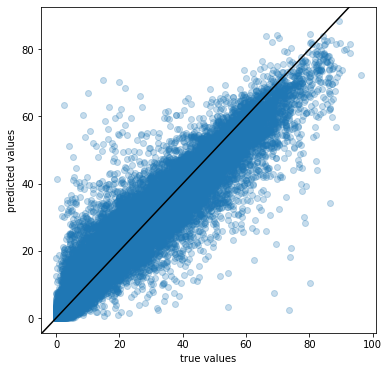

In [90]:
plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [110]:
columns = []
columns.append('clay.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,clay.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,40.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,26.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,22.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,50.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,32.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,34.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,10.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [113]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['clay.tot_iso.11277_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.426867,0.445981,-0.097554,-0.115858,0.010691,0.057398,-0.062355,-0.014286,0.002441,0.002888,...,-0.000028,0.000012,0.000033,1.854340e-05,2.570722e-05,0.000027,-0.000034,-0.000023,-0.000037,0.000007
1,0.815643,-0.151947,-0.009367,0.082743,-0.112105,0.059438,-0.086408,0.040031,-0.000053,0.029057,...,-0.000001,-0.000034,0.000077,6.596488e-06,-3.928578e-06,0.000057,-0.000007,0.000075,0.000021,-0.000046
2,1.873808,0.178253,0.462634,-0.154774,-0.129081,-0.146774,0.059043,0.008890,-0.008493,0.007352,...,0.000076,-0.000076,0.000010,-7.053188e-06,-1.016238e-05,0.000011,0.000032,0.000019,-0.000063,-0.000005
3,-0.675079,0.837982,0.927873,0.007627,0.041872,-0.165996,-0.120650,-0.009311,-0.006537,0.003826,...,-0.000004,-0.000026,0.000152,-1.354577e-05,1.059250e-05,0.000038,0.000027,0.000040,-0.000101,-0.000033
4,1.787644,-0.296787,0.194944,-0.089081,-0.025675,0.060734,0.012103,0.003937,-0.016223,0.016294,...,-0.000018,0.000038,0.000059,1.400766e-05,-5.829794e-05,-0.000011,0.000042,-0.000051,0.000017,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,-2.951010,0.406059,0.537998,-0.125906,-0.248180,-0.100000,0.010103,-0.122132,0.104462,-0.007924,...,0.000015,-0.000029,0.000094,-3.533185e-05,-6.387761e-06,0.000101,-0.000021,-0.000032,0.000045,0.000015
22646,-1.351956,-0.033673,0.582056,-0.183455,-0.279146,-0.126382,-0.017017,-0.106335,0.120903,-0.004938,...,0.000043,-0.000036,0.000060,2.675819e-09,-1.030805e-07,0.000072,-0.000050,-0.000058,-0.000028,0.000068
22647,-3.097987,0.611034,0.409455,0.058125,-0.187787,-0.176975,-0.023434,-0.025526,0.043103,-0.016537,...,-0.000046,0.000033,0.000017,-6.171467e-06,-1.546161e-05,0.000074,-0.000025,-0.000014,-0.000007,0.000013
22648,-2.612840,0.215849,-0.004343,0.112881,-0.209746,-0.009007,-0.026507,0.039058,0.070577,-0.051809,...,-0.000029,-0.000007,0.000067,-5.847558e-05,-2.466202e-05,0.000090,0.000034,-0.000033,0.000044,0.000009


In [114]:
sum(pca.explained_variance_ratio_)

0.9999999902362963

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [116]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 54.48264467249802
R^2 for 1 committees: 0.6701758696003141


RMSE for 5 committees: 48.32377929968456
R^2 for 5 committees: 0.7074600805274376


RMSE for 10 committees: 48.02594579379384
R^2 for 10 committees: 0.7092630891309073


RMSE for 15 committees: 46.978037902029605
R^2 for 15 committees: 0.7156068580726997


RMSE for 20 committees: 46.69238354429689
R^2 for 20 committees: 0.7173361371981977




RMSE: 41.6384203551388
R^2: 0.7447672760560603
bias: 4.591729139797197
RPIQ: 0.3715394189012936


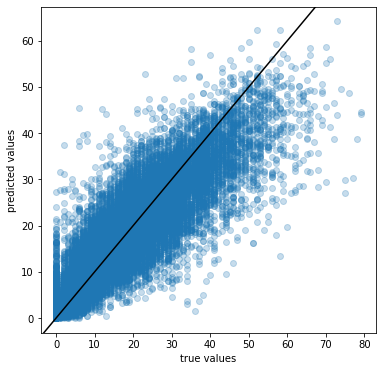

In [117]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SAND

## KSSL MIR

In [126]:
columns = []
columns.append('sand.tot_usda.c60_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_usda.c60_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,31.3,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,31.3,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,24.8,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,27.0,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,31.1,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,59.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,67.6,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,40.1,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,23.6,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [127]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['sand.tot_usda.c60_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-1.020466,-0.966502,-0.544274,-1.480060,1.583452,0.559173,-0.341112,-0.264737,0.326039,0.217852,...,0.000185,-0.002056,-0.001440,-0.001865,0.000861,-0.000053,0.000455,-0.000998,-0.000717,0.000031
1,-4.502680,-1.426081,-1.215412,-1.436471,0.766175,0.647558,-0.201949,-0.026332,0.246929,0.316151,...,-0.002342,-0.001901,0.000548,-0.001738,0.002631,-0.002356,0.002478,-0.001190,-0.002400,0.002684
2,-5.470847,0.310194,-2.354142,-1.106881,0.857413,0.625834,-0.055519,0.233799,0.142290,0.372004,...,-0.001227,0.001686,-0.002329,-0.002704,0.002682,-0.000126,0.002583,0.001079,0.001814,-0.000433
3,-4.132983,0.607320,-3.048389,-1.091270,0.604737,0.163332,0.290857,0.428771,0.035887,0.382114,...,0.002332,0.000103,-0.004705,-0.000362,0.002926,0.001381,0.000209,-0.002113,-0.000604,-0.000362
4,-1.714241,1.009512,-3.194952,-1.135289,0.445020,0.096328,0.548868,0.290858,-0.123347,0.233094,...,0.004373,-0.004059,-0.004996,0.000021,0.000731,-0.000631,-0.001324,-0.000250,-0.000105,-0.001276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48678,-3.514798,0.454221,-1.746897,-0.735735,1.471125,-0.883392,0.935090,0.005806,-0.584899,-0.568565,...,0.002093,0.007399,0.002301,0.002435,0.007752,-0.000986,0.000237,-0.002226,0.003294,-0.000018
48679,-3.127963,0.059301,-1.561087,-0.805603,1.198724,-0.878197,1.076010,0.022634,-0.513181,-0.674201,...,0.005974,0.008042,0.004490,0.000936,0.005021,-0.000074,-0.001377,0.000085,0.002545,-0.000793
48680,-3.773471,0.752836,-2.419806,-0.537202,1.807894,-0.614038,0.685441,0.388267,-0.446668,-0.012414,...,0.005551,0.003166,0.000974,0.000759,0.000406,0.002875,0.000154,-0.006199,0.002576,0.000434
48681,-4.430602,1.971808,-1.174838,-1.789275,0.457486,-2.458207,0.697787,-0.629089,-0.562826,-1.362792,...,0.012117,0.002569,-0.004483,-0.003355,0.005695,-0.002850,0.004829,0.005306,-0.004468,0.000763


In [128]:
sum(pca.explained_variance_ratio_)

0.9999871198347094

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [130]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 130.11106920807455
R^2 for 1 committees: 0.8424974378873816


RMSE for 5 committees: 117.09886318473418
R^2 for 5 committees: 0.858249024588555


RMSE for 10 committees: 109.59674717358084
R^2 for 10 committees: 0.8673305155040829


RMSE for 15 committees: 107.57342280476244
R^2 for 15 committees: 0.8697797980594676


RMSE for 20 committees: 107.25018686624662
R^2 for 20 committees: 0.8701710828962842




RMSE: 84.56052271764948
R^2: 0.8999382020381808
bias: 6.394395910657642
RPIQ: 0.4933396666480651


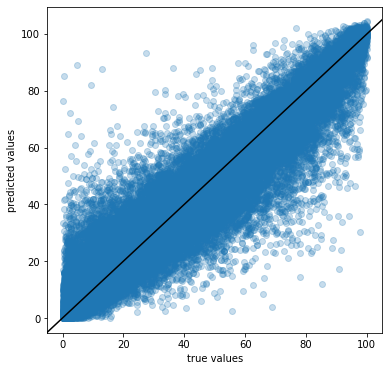

In [132]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [135]:
columns = []
columns.append('sand.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,48.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,60.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,8.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,56.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,37.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,23.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,39.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,43.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,79.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [136]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['sand.tot_iso.11277_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.426867,0.445981,-0.097554,-0.115858,0.010691,0.057398,-0.062355,-0.014286,0.002441,0.002888,...,-2.715130e-05,0.000012,0.000033,1.981182e-05,0.000025,0.000029,-0.000039,-0.000018,-0.000038,2.486108e-06
1,0.815643,-0.151947,-0.009367,0.082743,-0.112105,0.059438,-0.086408,0.040031,-0.000053,0.029057,...,3.397297e-07,-0.000034,0.000076,7.490909e-06,-0.000012,0.000052,0.000002,0.000075,0.000032,-2.519362e-05
2,1.873808,0.178253,0.462634,-0.154774,-0.129081,-0.146774,0.059043,0.008890,-0.008493,0.007352,...,7.529642e-05,-0.000076,0.000012,-8.399636e-06,-0.000012,0.000011,0.000034,0.000026,-0.000064,-1.396073e-05
3,-0.675079,0.837982,0.927873,0.007627,0.041872,-0.165996,-0.120650,-0.009311,-0.006537,0.003826,...,-4.756628e-06,-0.000026,0.000156,-1.728157e-05,0.000012,0.000042,0.000030,0.000050,-0.000087,-6.153107e-05
4,1.787644,-0.296787,0.194944,-0.089081,-0.025675,0.060734,0.012103,0.003937,-0.016223,0.016294,...,-1.845497e-05,0.000039,0.000063,1.208474e-05,-0.000057,-0.000012,0.000040,-0.000057,0.000014,-3.755037e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,-2.951010,0.406059,0.537998,-0.125906,-0.248180,-0.100000,0.010103,-0.122132,0.104462,-0.007924,...,1.638867e-05,-0.000030,0.000091,-3.429866e-05,-0.000010,0.000101,-0.000022,-0.000034,0.000042,2.960719e-05
22646,-1.351956,-0.033673,0.582056,-0.183455,-0.279146,-0.126382,-0.017017,-0.106335,0.120903,-0.004938,...,4.399961e-05,-0.000037,0.000059,8.259142e-07,-0.000002,0.000073,-0.000055,-0.000054,-0.000049,6.103534e-05
22647,-3.097987,0.611034,0.409455,0.058125,-0.187787,-0.176975,-0.023434,-0.025526,0.043103,-0.016537,...,-4.570375e-05,0.000033,0.000015,-2.354673e-06,-0.000018,0.000067,-0.000028,-0.000017,-0.000016,-6.493192e-07
22648,-2.612840,0.215849,-0.004343,0.112881,-0.209746,-0.009007,-0.026507,0.039058,0.070577,-0.051809,...,-2.958939e-05,-0.000007,0.000066,-5.981486e-05,-0.000027,0.000090,0.000031,-0.000031,0.000036,1.991268e-05


In [137]:
sum(pca.explained_variance_ratio_)

0.9999999902328632

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [139]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 388.93922732483327
R^2 for 1 committees: 0.4281913558690923


RMSE for 5 committees: 343.29950552338335
R^2 for 5 committees: 0.4952897239645354


RMSE for 10 committees: 333.0447728891696
R^2 for 10 committees: 0.5103659732897223


RMSE for 15 committees: 329.82942400618333
R^2 for 15 committees: 0.5150930981360231


RMSE for 20 committees: 325.1471039493598
R^2 for 20 committees: 0.5219769270094812




RMSE: 287.33772250183546
R^2: 0.5718115756734312
bias: 13.077888300492084
RPIQ: 0.096527428453563


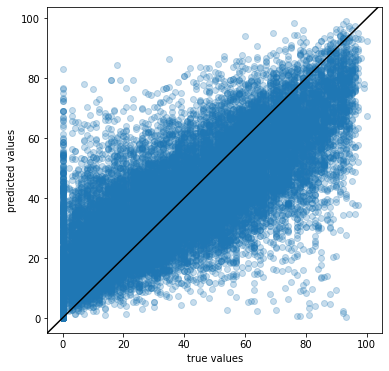

In [140]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SILT

## KSSL MIR

In [141]:
columns = []
columns.append('silt.tot_usda.c62_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_usda.c62_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,40.5,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,33.0,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,28.4,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,31.2,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,33.4,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,26.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,21.1,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,36.5,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,51.5,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [142]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['silt.tot_usda.c62_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-1.020379,-0.966503,-0.543864,-1.480094,1.583456,0.559357,-0.340972,-0.264747,0.326065,0.217824,...,0.000176,-0.002042,-0.001447,-0.001863,0.000859,-0.000130,0.000506,-0.000963,-0.000862,-0.000062
1,-4.502577,-1.426086,-1.215305,-1.436505,0.766334,0.647627,-0.201906,-0.026336,0.246936,0.316137,...,-0.002351,-0.001885,0.000559,-0.001711,0.002636,-0.002402,0.002578,-0.001121,-0.002611,0.002678
2,-5.470731,0.310186,-2.354033,-1.106942,0.857912,0.625878,-0.055526,0.233798,0.142286,0.372002,...,-0.001236,0.001694,-0.002299,-0.002641,0.002686,-0.000108,0.002658,0.001090,0.001690,0.000014
3,-4.132856,0.607310,-3.048343,-1.091343,0.605493,0.163325,0.290797,0.428775,0.035870,0.382121,...,0.002328,0.000104,-0.004702,-0.000357,0.002917,0.001358,0.000224,-0.002137,-0.000651,-0.000263
4,-1.714109,1.009502,-3.194934,-1.135363,0.445834,0.096298,0.548779,0.290866,-0.123372,0.233115,...,0.004380,-0.004078,-0.004993,0.000008,0.000722,-0.000588,-0.001402,-0.000379,0.000034,-0.001187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48679,-3.514696,0.454216,-1.746569,-0.735794,1.471573,-0.883241,0.935175,0.005810,-0.584893,-0.568566,...,0.002098,0.007405,0.002291,0.002352,0.007744,-0.001024,0.000258,-0.002326,0.003498,-0.000635
48680,-3.127860,0.059295,-1.560844,-0.805653,1.199105,-0.878070,1.076081,0.022639,-0.513178,-0.674195,...,0.005971,0.008053,0.004476,0.000864,0.004996,-0.000125,-0.001350,-0.000028,0.002693,-0.001270
48681,-3.773364,0.752830,-2.419380,-0.537281,1.808539,-0.613874,0.685515,0.388269,-0.446667,-0.012423,...,0.005546,0.003171,0.000945,0.000681,0.000393,0.002803,0.000155,-0.006234,0.002634,-0.000048
48682,-4.430499,1.971802,-1.174760,-1.789306,0.457924,-2.458157,0.697865,-0.629088,-0.562805,-1.362794,...,0.012118,0.002588,-0.004498,-0.003359,0.005709,-0.002848,0.004890,0.005335,-0.004386,0.000451


In [143]:
sum(pca.explained_variance_ratio_)

0.9999871195692647

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [145]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 90.58610867801583
R^2 for 1 committees: 0.7768909677617845


RMSE for 5 committees: 80.68055091722576
R^2 for 5 committees: 0.8012878586100826


RMSE for 10 committees: 77.74800692307667
R^2 for 10 committees: 0.8085105670593018


RMSE for 15 committees: 76.4216791499734
R^2 for 15 committees: 0.8117772456947596


RMSE for 20 committees: 75.58805325679884
R^2 for 20 committees: 0.8138304243662928




RMSE: 69.03375992784831
R^2: 0.8341445824212449
bias: 5.92561765211521
RPIQ: 0.3655683950564127


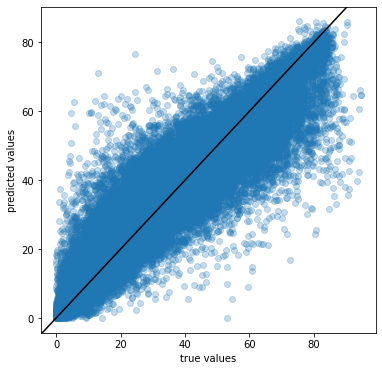

In [146]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [148]:
columns = []
columns.append('silt.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,45.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,27.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,52.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,18.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,41.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,27.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,28.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,23.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,11.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [149]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['silt.tot_iso.11277_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.426867,0.445981,-0.097554,-0.115858,0.010691,0.057398,-0.062355,-0.014286,0.002441,0.002888,...,-2.811044e-05,0.000012,0.000032,0.000017,0.000028,0.000026,-0.000037,-0.000022,-0.000039,6.792338e-06
1,0.815643,-0.151947,-0.009367,0.082743,-0.112105,0.059438,-0.086408,0.040031,-0.000053,0.029057,...,-5.719970e-07,-0.000035,0.000077,0.000010,-0.000007,0.000058,-0.000004,0.000077,0.000014,-3.604028e-05
2,1.873808,0.178253,0.462634,-0.154774,-0.129081,-0.146774,0.059043,0.008890,-0.008493,0.007352,...,7.600409e-05,-0.000077,0.000011,-0.000005,-0.000013,0.000012,0.000036,0.000020,-0.000072,-2.087056e-06
3,-0.675079,0.837982,0.927873,0.007627,0.041872,-0.165996,-0.120650,-0.009311,-0.006537,0.003826,...,-3.408127e-06,-0.000025,0.000154,-0.000017,0.000011,0.000040,0.000031,0.000041,-0.000098,-5.082760e-05
4,1.787644,-0.296787,0.194944,-0.089081,-0.025675,0.060734,0.012103,0.003937,-0.016223,0.016294,...,-1.782647e-05,0.000039,0.000062,0.000013,-0.000058,-0.000012,0.000042,-0.000054,0.000015,-1.072789e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,-2.951010,0.406059,0.537998,-0.125906,-0.248180,-0.100000,0.010103,-0.122132,0.104462,-0.007924,...,1.474021e-05,-0.000029,0.000094,-0.000038,-0.000004,0.000101,-0.000028,-0.000038,0.000043,2.699888e-05
22646,-1.351956,-0.033673,0.582056,-0.183455,-0.279146,-0.126382,-0.017017,-0.106335,0.120903,-0.004938,...,4.253004e-05,-0.000036,0.000060,-0.000004,0.000002,0.000071,-0.000054,-0.000057,-0.000033,6.515898e-05
22647,-3.097987,0.611034,0.409455,0.058125,-0.187787,-0.176975,-0.023434,-0.025526,0.043103,-0.016537,...,-4.735498e-05,0.000035,0.000016,-0.000013,-0.000012,0.000072,-0.000027,-0.000008,0.000002,-5.394949e-07
22648,-2.612840,0.215849,-0.004343,0.112881,-0.209746,-0.009007,-0.026507,0.039058,0.070577,-0.051809,...,-2.818923e-05,-0.000007,0.000067,-0.000062,-0.000026,0.000089,0.000036,-0.000030,0.000043,8.918477e-06


In [150]:
sum(pca.explained_variance_ratio_)

0.9999999902384044

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [152]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 207.67390825485057
R^2 for 1 committees: 0.4224846434429005


RMSE for 5 committees: 176.79043125525737
R^2 for 5 committees: 0.5083677588569739


RMSE for 10 committees: 173.29316858053727
R^2 for 10 committees: 0.5180932121772162


RMSE for 15 committees: 171.76088953799425
R^2 for 15 committees: 0.5223542899651551


RMSE for 20 committees: 171.5626031436306
R^2 for 20 committees: 0.5229056998110218




RMSE: 147.89434267964538
R^2: 0.5880396722993106
bias: 9.4351904993757
RPIQ: 0.11845555923736514


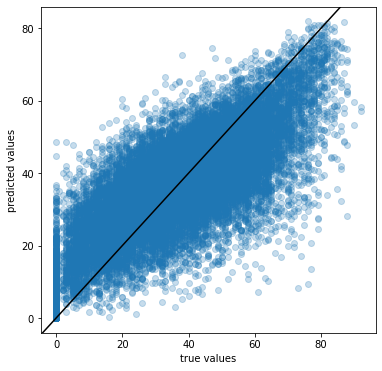

In [153]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ORGANIC CARBON

## KSSL MIR

In [154]:
columns = []
columns.append('oc_usda.c729_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_usda.c729_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.9100,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.8900,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.0000,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.4800,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.1208,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.5084,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.3148,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.6312,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.2508,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [155]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['oc_usda.c729_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.377189,-0.803534,-0.236742,-1.703770,-1.345285,0.648752,-0.326263,-0.314756,0.151886,-0.315495,...,0.003268,0.002889,-0.000351,-0.001207,-0.001234,0.001481,-0.000815,0.001930,0.001459,0.000569
1,-3.773479,-1.204297,-1.482092,-1.598064,-0.902816,0.698489,-0.194837,-0.063309,0.100964,-0.315718,...,0.002575,0.002041,0.000579,-0.000779,0.000762,0.002481,-0.000590,0.002264,0.000839,0.003195
2,-4.651714,0.595482,-2.460586,-1.316321,-1.457710,0.722456,-0.088379,0.212446,0.048111,-0.148134,...,0.003007,0.004581,0.001067,-0.002263,0.001681,0.004626,0.000584,0.001302,0.000859,-0.002286
3,-3.263143,0.893187,-3.068097,-1.265849,-1.611894,0.253902,0.256662,0.410080,-0.048665,-0.101837,...,0.001933,0.007892,-0.000884,0.000789,-0.000548,0.002765,-0.001747,0.001360,0.000670,0.001207
4,-0.832844,1.261302,-3.055465,-1.284375,-1.566190,0.163826,0.500026,0.322948,-0.043222,0.264772,...,0.002020,0.007724,-0.005969,0.001814,-0.001160,0.000999,-0.002267,-0.000445,-0.000956,0.001989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55850,-2.780112,0.698341,-1.468592,-0.926236,-1.935209,-0.698890,0.826675,-0.033846,-0.568375,0.648061,...,0.000617,0.001606,0.010815,-0.002993,-0.000043,0.001901,-0.006336,0.006256,-0.006035,-0.002726
55851,-2.400316,0.283872,-1.399100,-0.956557,-1.632871,-0.722916,0.978631,0.011347,-0.491547,0.672323,...,-0.000357,0.004321,0.011677,-0.002648,-0.000993,0.001482,-0.005350,0.002959,-0.005476,-0.002475
55852,-3.006980,1.039754,-1.924016,-0.800252,-2.518606,-0.377027,0.590788,0.302789,-0.551908,0.300705,...,0.000618,0.000307,0.005628,-0.001780,-0.004478,-0.000342,-0.001421,0.005913,-0.004332,-0.002159
55853,-3.662642,2.157010,-1.458461,-1.774862,-0.745889,-2.460334,0.619866,-0.576059,-0.378039,0.816872,...,-0.010855,0.008815,-0.000358,0.000181,0.005851,0.006312,-0.000189,0.001244,0.002103,0.003121


In [156]:
sum(pca.explained_variance_ratio_)

0.9999876405593805

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [158]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 4.812482345938972
R^2 for 1 committees: 0.950921182425601


RMSE for 5 committees: 2.9022532852824536
R^2 for 5 committees: 0.9704021439864033


RMSE for 10 committees: 2.5929893925048346
R^2 for 10 committees: 0.9735560893071149


RMSE for 15 committees: 2.5435683283976456
R^2 for 15 committees: 0.97406009684736


RMSE for 20 committees: 2.49056263701421
R^2 for 20 committees: 0.9746006612527561




RMSE: 1.129424292892074
R^2: 0.9884317735103155
bias: 0.38828652442693623
RPIQ: 1.995490291836236


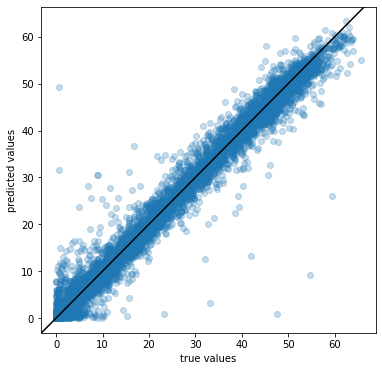

In [159]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [161]:
columns = []
columns.append('oc_iso.10694_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_iso.10694_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,9.11,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,2.14,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,1.56,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.98,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,3.35,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.84,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,1.08,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.67,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.57,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [162]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['oc_iso.10694_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.282084,0.468792,-0.099416,-0.122922,0.008270,0.060994,-0.064813,-0.018273,0.004052,0.001700,...,0.000047,3.220749e-05,0.000011,0.000012,0.000003,-0.000027,1.412808e-05,-0.000048,3.922667e-07,-0.000023
1,0.960800,-0.125627,0.005452,0.071959,-0.108119,0.059972,-0.096277,0.040820,0.007001,0.028815,...,-0.000093,1.313236e-05,-0.000023,-0.000024,0.000034,-0.000069,-8.797443e-07,-0.000076,-5.609583e-05,-0.000014
2,2.018114,0.211346,0.465043,-0.172184,-0.123954,-0.157544,0.055438,0.018517,-0.007862,0.010130,...,-0.000021,-1.581509e-05,-0.000025,0.000007,0.000073,0.000006,5.970173e-05,-0.000011,3.040829e-05,-0.000030
3,-0.532199,0.869678,0.927895,-0.026430,0.055823,-0.173424,-0.116186,-0.016011,-0.011813,-0.000320,...,0.000063,5.900714e-05,-0.000129,0.000030,0.000157,0.000003,1.044012e-05,-0.000121,8.293491e-05,-0.000104
4,1.932935,-0.266347,0.204350,-0.109689,-0.024991,0.055877,0.007002,0.009199,-0.011258,0.021262,...,-0.000064,1.620073e-06,0.000002,-0.000022,-0.000046,-0.000041,1.202505e-05,-0.000026,2.929629e-05,-0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40170,-2.806924,0.434093,0.537084,-0.146144,-0.243728,-0.106616,0.014965,-0.103266,0.113039,-0.039688,...,-0.000037,7.244232e-05,0.000053,-0.000086,0.000058,-0.000073,-1.924558e-05,-0.000082,-7.166297e-05,-0.000039
40171,-1.207316,-0.002321,0.583649,-0.208407,-0.276622,-0.136205,-0.013824,-0.088792,0.122823,-0.045174,...,-0.000037,2.222981e-05,0.000030,-0.000094,0.000095,-0.000045,4.258577e-05,-0.000054,-2.984392e-05,0.000009
40172,-2.954377,0.635402,0.412480,0.043823,-0.177547,-0.178759,-0.026106,-0.017539,0.038498,-0.029057,...,-0.000062,2.948366e-05,0.000009,-0.000051,-0.000001,-0.000021,-2.880367e-05,-0.000092,1.295524e-05,-0.000032
40173,-2.468232,0.237416,0.005572,0.106629,-0.203854,-0.006834,-0.036128,0.046570,0.045997,-0.071390,...,-0.000220,-2.647883e-05,0.000003,-0.000061,0.000074,-0.000061,-9.765488e-05,-0.000060,-5.394276e-05,-0.000123


In [163]:
sum(pca.explained_variance_ratio_)

0.9999999888725439

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [166]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 17.730178533619043
R^2 for 1 committees: 0.7270690469074588


RMSE for 5 committees: 10.679239782043101
R^2 for 5 committees: 0.8356082491504464


RMSE for 10 committees: 9.364264482497632
R^2 for 10 committees: 0.8558504289523909


RMSE for 15 committees: 9.431933758061996
R^2 for 15 committees: 0.854808756425527


RMSE for 20 committees: 9.378478288275701
R^2 for 20 committees: 0.8556316275708524




RMSE: 5.666938595906864
R^2: 0.918971672084654
bias: 1.14474777659459
RPIQ: 0.4203318079324562


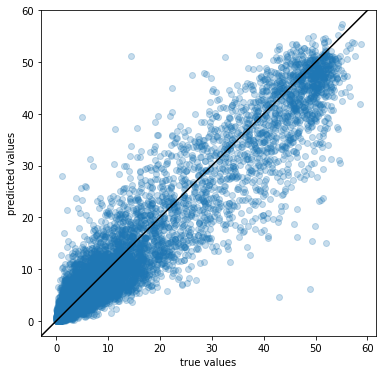

In [167]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# TOTAL CARBON

## KSSL MIR

In [168]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.91440,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.89126,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.00051,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.48350,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.25695,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.71266,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.55271,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.68971,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.55503,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [169]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['c.tot_usda.a622_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,0.554171,-0.706215,-0.530136,-1.342949,-1.750602,0.463529,-0.327414,-0.342832,-0.128235,0.287133,...,0.000539,0.001528,0.001960,0.003627,0.001664,-0.001795,-0.001377,0.002874,0.000595,0.000264
1,-2.729577,-0.565008,-2.107831,-1.428933,-1.393189,0.604427,-0.205852,-0.078132,-0.040496,0.241863,...,-0.000248,0.002278,0.002022,0.004194,0.002420,-0.002023,-0.000909,0.001923,0.002135,0.000051
2,-3.444373,1.467692,-2.632098,-1.081211,-1.937589,0.714442,-0.061930,0.196629,0.059386,0.093796,...,0.000254,0.000591,0.000758,0.005294,0.000406,-0.002736,-0.000446,0.002541,0.004101,0.001282
3,-1.996603,1.823399,-3.040679,-1.002882,-2.095035,0.299446,0.314923,0.410547,0.186930,0.061899,...,-0.001652,-0.002283,0.001236,0.007873,0.001560,0.000190,-0.001606,0.003088,0.003544,0.000755
4,0.432771,2.015722,-2.740819,-1.014180,-2.053109,0.231509,0.598948,0.400214,0.090111,-0.280461,...,-0.001160,-0.002617,0.001374,0.007782,0.004382,0.002032,-0.005003,0.003529,0.000077,0.000869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76590,-1.665353,1.249457,-1.568235,-0.467129,-2.115756,-0.760653,0.907413,-0.051366,0.421847,-0.677736,...,-0.009322,-0.004923,-0.000440,0.005964,-0.015001,-0.007581,-0.005528,-0.000628,-0.002794,0.004128
76591,-1.312148,0.806931,-1.585582,-0.561720,-1.825088,-0.774636,1.056486,0.026806,0.353009,-0.674458,...,-0.008477,-0.004999,0.000650,0.008754,-0.013974,-0.006544,-0.003637,0.000930,-0.004378,0.002982
76592,-1.841926,1.690644,-1.895980,-0.241024,-2.711544,-0.427327,0.663858,0.217849,0.573280,-0.392594,...,-0.003969,-0.001718,0.001214,0.001419,-0.010849,-0.002916,-0.004639,-0.001350,-0.002276,0.000822
76593,-2.446790,2.786711,-1.381499,-1.528344,-1.047492,-2.478787,0.732663,-0.417385,0.001633,-0.726338,...,-0.014377,-0.014589,-0.003195,0.008991,0.001008,0.001044,-0.002037,0.002705,0.004398,0.002118


In [170]:
sum(pca.explained_variance_ratio_)

0.9999875536879718

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [172]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 8.236833911362517
R^2 for 1 committees: 0.9575045689300988


RMSE for 5 committees: 5.507497739954991
R^2 for 5 committees: 0.9715857460409593


RMSE for 10 committees: 5.248415107816079
R^2 for 10 committees: 0.9729224038215999


RMSE for 15 committees: 5.140688956749836
R^2 for 15 committees: 0.9734781840250524


RMSE for 20 committees: 5.20445677304407
R^2 for 20 committees: 0.973149193435832




RMSE: 2.378817418963025
R^2: 0.9870991559354163
bias: 0.6253888145594596
RPIQ: 1.628036231517041


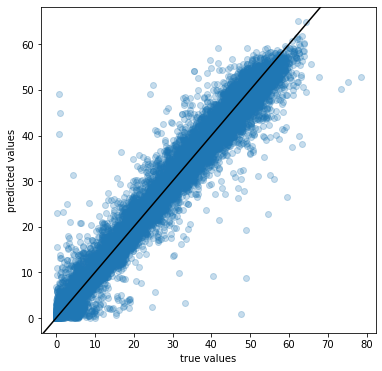

In [173]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [179]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.87709,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,2.03902,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,2.98289,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,3.27698,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,3.36873,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.99338,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,2.10827,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.99398,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,4.58924,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [180]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns]), columns=column_names)
y = data['c.tot_usda.a622_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,1.268463,0.036684,-0.332885,0.228880,-0.032381,0.009978,0.040015,-0.010386,-0.066660,-0.002204,...,0.000633,0.000310,-0.000449,0.000188,-0.000005,0.000393,-0.000192,-0.000074,0.000041,-0.000007
1,4.490314,0.722009,0.122425,0.261928,-0.032865,0.043994,0.050997,0.011144,-0.056499,-0.006300,...,0.000369,-0.000142,-0.000110,0.000246,-0.000070,0.000399,-0.000285,-0.000189,0.000123,0.000053
2,2.094914,0.261901,-0.090273,0.310459,-0.049045,0.003745,0.027242,-0.004847,-0.060736,-0.006243,...,0.000457,-0.000393,0.000056,0.000152,0.000272,0.000360,-0.000521,-0.000027,0.000202,0.000196
3,-0.038906,0.273795,-0.179049,0.322715,-0.021656,0.036172,0.024608,-0.019130,-0.068341,-0.006851,...,0.000347,0.000012,-0.000077,0.000217,0.000081,0.000283,-0.000340,0.000188,0.000271,0.000031
4,-2.844167,0.878478,-0.075578,0.289352,0.005323,0.079728,-0.013448,-0.110223,-0.113616,0.002589,...,0.000244,0.000139,-0.000328,0.000137,-0.000025,0.000549,-0.000390,-0.000022,-0.000100,0.000342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19802,-3.398824,-0.811198,0.051721,-0.115372,0.170820,-0.100549,0.171554,0.089967,-0.073170,-0.038987,...,-0.000326,-0.000070,0.000148,0.000045,0.000295,0.000085,0.000056,0.000103,0.000220,0.000104
19803,-1.528450,-0.851412,0.021319,0.091624,0.087852,-0.071520,0.229657,0.033704,-0.054618,-0.026576,...,-0.000370,-0.000168,0.000264,-0.000123,0.000285,-0.000224,0.000021,-0.000030,0.000344,-0.000145
19804,-2.007639,-1.077052,-0.187860,0.140722,0.063851,-0.078403,0.237546,0.002484,-0.036980,-0.020169,...,0.000146,0.000094,0.000191,0.000036,0.000194,-0.000424,-0.000035,-0.000137,0.000178,0.000078
19805,2.795617,0.071548,0.228889,0.250854,-0.093650,-0.026137,0.001099,0.031760,-0.035909,-0.016450,...,-0.000025,-0.000026,0.000306,0.000459,-0.000219,0.000188,-0.000060,-0.000098,-0.000089,-0.000231


In [181]:
sum(pca.explained_variance_ratio_)

0.9999996427950099

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [183]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 47.080911450526806
R^2 for 1 committees: 0.8477335197275174


RMSE for 5 committees: 26.364442763758902
R^2 for 5 committees: 0.9147335771483249


RMSE for 10 committees: 24.473391804343066
R^2 for 10 committees: 0.9208495095874988


RMSE for 15 committees: 23.92083207241362
R^2 for 15 committees: 0.9226365677163461


RMSE for 20 committees: 23.498435529250536
R^2 for 20 committees: 0.9240026592580167




RMSE: 16.496262101004515
R^2: 0.94699546580517
bias: 2.1384931743436155
RPIQ: 1.2887700877601664


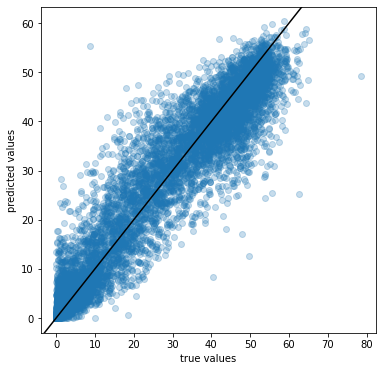

In [184]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM CARBONATE

## KSSL MIR

In [185]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7892,1.15654,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
7893,7.79477,1.63972,1.64560,1.65168,1.65828,1.67122,1.67840,1.68572,1.69088,1.69547,...,0.21335,0.21278,0.21240,0.21192,0.21130,0.21072,0.21018,0.20965,0.20912,0.20855
7894,14.59579,1.55310,1.55728,1.56250,1.56868,1.58017,1.58632,1.59285,1.59746,1.60127,...,0.14095,0.14043,0.14005,0.13960,0.13908,0.13848,0.13800,0.13750,0.13705,0.13650
7901,4.91013,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,5.27398,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.67679,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.96300,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.49272,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,10.91097,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [186]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['caco3_usda.a54_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-1.672017,1.256478,-2.682542,-1.433564,0.610632,-0.019283,-0.113648,0.528705,0.114838,0.131991,...,-0.003278,0.001241,0.000026,0.004158,-0.005039,-0.001516,0.003015,-0.001507,0.001460,-0.000335
1,-1.340926,-1.754068,-1.411010,-1.797403,-0.297150,-0.261299,-0.295245,0.245088,0.033783,-0.296500,...,0.001004,0.000987,-0.011323,0.005328,-0.007291,0.001483,-0.001468,0.004442,0.005756,-0.001147
2,2.503889,-2.931523,-0.993326,-2.110043,0.214220,-0.406008,-0.223439,-0.060348,-0.218141,-0.247239,...,-0.002844,-0.000393,-0.013072,0.008220,-0.003645,0.003231,-0.000119,-0.000022,0.006042,-0.000868
3,1.828374,-1.016910,-2.041668,-0.476798,0.492055,-0.071241,-0.212007,-0.375553,-0.383685,-0.245766,...,-0.003110,-0.000160,-0.000719,-0.001912,0.006931,0.000658,-0.000078,-0.004647,-0.003114,-0.000629
4,3.148625,-1.814355,-3.180122,0.214455,0.485318,0.287911,0.140979,0.258930,-0.852113,-0.191686,...,-0.007444,0.002604,0.000645,-0.005117,0.004970,-0.001955,-0.000401,-0.012501,0.001679,-0.002747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,-3.538205,1.107550,-1.435049,-0.269014,0.921951,-1.138498,0.521987,0.153049,0.848374,-0.252426,...,-0.004494,0.007846,0.000474,0.000361,0.001272,0.005623,-0.002717,-0.002091,-0.004242,-0.000316
27472,-3.177970,1.331101,-1.031344,-0.417239,0.721258,-1.054140,0.697530,0.149310,0.808862,-0.392183,...,-0.004835,0.007807,0.003177,0.001499,0.001964,0.005866,-0.001947,-0.002327,-0.004895,-0.000768
27473,-3.787466,1.246189,-2.222148,-0.165694,1.202933,-0.936936,0.070657,0.658974,0.632525,-0.008694,...,-0.001671,0.007341,-0.001517,0.001021,-0.002801,0.001965,-0.002146,-0.002069,-0.003656,-0.001132
27474,-4.277837,-1.137912,-1.247041,-1.097041,0.105809,-2.397535,0.640149,-0.602576,0.718903,-0.464258,...,-0.003829,0.002637,0.003535,-0.000114,-0.003714,0.000326,-0.003898,0.000038,-0.003137,0.002858


In [187]:
sum(pca.explained_variance_ratio_)

0.9999845744683603

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07)

In [189]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 7.1987654649354
R^2 for 1 committees: 0.9566495164733175


RMSE for 5 committees: 4.506996846485348
R^2 for 5 committees: 0.9728591668251931


RMSE for 10 committees: 4.3244676242622155
R^2 for 10 committees: 0.9739583455773922


RMSE for 15 committees: 4.245201071990201
R^2 for 15 committees: 0.9744356834466731


RMSE for 20 committees: 4.207611787044163
R^2 for 20 committees: 0.9746620436032541




RMSE: 3.7490647354715496
R^2: 0.9784935040857672
bias: 0.7139091170232659
RPIQ: 2.8610740144830955


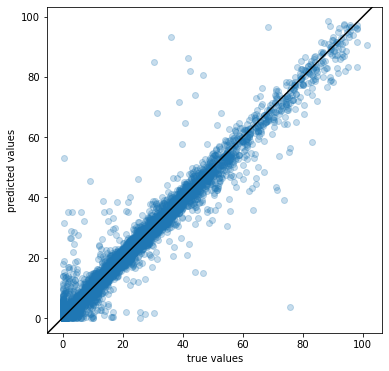

In [190]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [192]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18154,11.70912,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,19.17386,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,24.71582,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
18157,23.41195,0.114614,0.107037,0.108397,0.104465,0.106687,0.103698,0.106330,0.106408,0.104295,...,0.459933,0.458683,0.457679,0.456765,0.455724,0.454718,0.454004,0.453157,0.452541,0.451932
18158,22.90334,0.116095,0.108076,0.111325,0.108251,0.112229,0.108385,0.107814,0.109524,0.109611,...,0.464363,0.463432,0.462363,0.461403,0.460050,0.459393,0.458799,0.457731,0.457544,0.457192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95465,0.08360,0.099467,0.093240,0.108038,0.098440,0.088737,0.098356,0.098217,0.088650,0.093477,...,0.258237,0.258090,0.257298,0.255707,0.254340,0.253708,0.253343,0.252054,0.251013,0.250153
95466,0.08664,0.153284,0.148737,0.145614,0.139687,0.138406,0.140155,0.142946,0.131388,0.131516,...,0.407116,0.405612,0.404413,0.403627,0.402223,0.401902,0.401593,0.400400,0.399327,0.398628
95467,0.08191,0.147627,0.135499,0.135141,0.135262,0.127226,0.131343,0.129070,0.121714,0.120202,...,0.429762,0.428401,0.427610,0.426567,0.425907,0.425319,0.424506,0.423588,0.422193,0.421651
95474,0.24428,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [193]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns]), columns=column_names)
y = data['caco3_usda.a54_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,2.974668,0.125495,0.006962,0.207737,0.139931,0.051887,-0.027328,-0.005965,-0.051420,0.015199,...,-0.000019,0.000085,-0.000202,-0.000320,0.000356,0.000332,0.000073,0.000184,0.000101,-0.000038
1,0.841586,0.053405,-0.075261,0.242745,0.152197,0.056755,-0.035969,-0.006750,-0.053310,0.014803,...,-0.000038,-0.000254,-0.000499,-0.000004,0.000288,0.000199,-0.000138,0.000295,0.000316,-0.000117
2,-1.976276,0.582203,-0.254764,0.222866,0.165960,0.034569,-0.115653,-0.046475,-0.064284,0.029690,...,-0.000115,-0.000147,-0.000800,-0.000275,0.000104,0.000152,-0.000144,-0.000171,0.000334,-0.000175
3,-1.475258,0.345844,-0.353257,0.210142,0.201914,0.000605,-0.112043,-0.040177,-0.054391,0.034433,...,-0.000260,-0.000272,-0.001066,-0.000248,0.000174,0.000070,-0.000097,-0.000160,0.000387,0.000189
4,-1.659195,0.373110,-0.356559,0.226495,0.185719,0.031698,-0.097947,-0.038137,-0.065837,0.033808,...,0.000074,-0.000590,-0.000179,-0.000130,0.000087,0.000277,0.000145,-0.000204,-0.000087,-0.000311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,1.501527,1.606540,1.059027,-0.091947,-0.271511,-0.074797,0.051045,-0.065760,-0.070787,-0.098987,...,0.000491,-0.000275,-0.000094,0.000391,0.000648,-0.000312,0.000027,0.000454,-0.000266,-0.000093
9209,-2.030238,1.303321,0.263068,0.128155,-0.090579,-0.119153,-0.029778,-0.030472,-0.025187,-0.034885,...,0.000299,-0.000518,0.000021,-0.000043,-0.000082,-0.000028,0.000251,0.000007,-0.000073,0.000407
9210,-1.871769,0.778826,0.109600,0.066215,-0.001137,-0.159160,-0.024624,-0.030938,0.005253,-0.043392,...,0.000131,-0.000057,-0.000306,-0.000257,0.000064,0.000179,0.000407,0.000306,-0.000243,0.000362
9211,3.676401,0.109066,0.367419,0.113671,0.092274,0.074868,0.006762,-0.046385,-0.024640,-0.002665,...,0.000122,0.000139,0.000453,-0.000240,0.000047,0.000173,-0.000386,-0.000092,0.000189,-0.000274


In [194]:
sum(pca.explained_variance_ratio_)

0.9999995239262561

RMSE: 21.593666456220927
R^2: 0.7918924893230844
bias: 2.0169654565027177
RPIQ: 0.15186878117161814


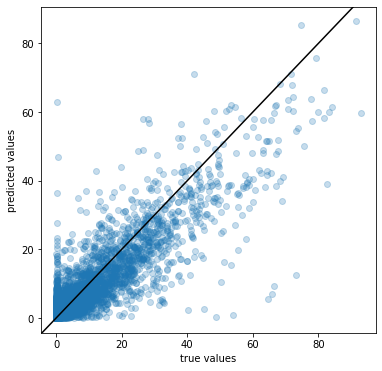

In [195]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [196]:
columns = []
columns.append('caco3_iso.10693_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_iso.10693_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.1,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.1,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.1,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.1,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.1,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.2,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.8,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.3,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [197]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['caco3_iso.10693_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.282084,0.468792,-0.099416,-0.122922,0.008270,0.060994,-0.064813,-0.018273,0.004052,0.001700,...,0.000047,3.275855e-05,1.270804e-05,0.000010,0.000003,-0.000023,0.000018,-0.000049,0.000003,-0.000022
1,0.960800,-0.125627,0.005452,0.071959,-0.108119,0.059972,-0.096277,0.040820,0.007001,0.028815,...,-0.000092,1.204972e-05,-2.428276e-05,-0.000023,0.000030,-0.000070,-0.000002,-0.000076,-0.000050,-0.000021
2,2.018114,0.211346,0.465043,-0.172184,-0.123954,-0.157544,0.055438,0.018517,-0.007862,0.010130,...,-0.000021,-1.706498e-05,-2.612662e-05,0.000008,0.000074,0.000002,0.000057,-0.000006,0.000030,-0.000030
3,-0.532199,0.869678,0.927895,-0.026430,0.055823,-0.173424,-0.116186,-0.016011,-0.011813,-0.000320,...,0.000062,5.993194e-05,-1.286636e-04,0.000030,0.000156,-0.000002,0.000013,-0.000123,0.000079,-0.000106
4,1.932935,-0.266347,0.204350,-0.109689,-0.024991,0.055877,0.007002,0.009199,-0.011258,0.021262,...,-0.000064,1.545520e-06,2.122946e-06,-0.000021,-0.000042,-0.000042,0.000011,-0.000019,0.000029,-0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40170,-2.806924,0.434093,0.537084,-0.146144,-0.243728,-0.106616,0.014965,-0.103266,0.113039,-0.039688,...,-0.000037,7.013428e-05,5.154867e-05,-0.000086,0.000061,-0.000081,-0.000016,-0.000075,-0.000075,-0.000028
40171,-1.207316,-0.002321,0.583649,-0.208407,-0.276622,-0.136205,-0.013824,-0.088792,0.122823,-0.045174,...,-0.000036,2.019553e-05,2.863393e-05,-0.000092,0.000096,-0.000051,0.000041,-0.000047,-0.000029,0.000013
40172,-2.954377,0.635402,0.412480,0.043823,-0.177547,-0.178759,-0.026106,-0.017539,0.038498,-0.029057,...,-0.000062,2.884145e-05,8.529624e-06,-0.000050,-0.000001,-0.000021,-0.000029,-0.000091,0.000012,-0.000032
40173,-2.468232,0.237416,0.005572,0.106629,-0.203854,-0.006834,-0.036128,0.046570,0.045997,-0.071390,...,-0.000218,-2.831958e-05,-1.043025e-07,-0.000060,0.000073,-0.000065,-0.000102,-0.000064,-0.000058,-0.000126


In [198]:
sum(pca.explained_variance_ratio_)

0.9999999888711529

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [200]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 67.79133999838761
R^2 for 1 committees: 0.5322663761408882


RMSE for 5 committees: 34.05481909709342
R^2 for 5 committees: 0.7650351217938922


RMSE for 10 committees: 30.26476393933661
R^2 for 10 committees: 0.7911850140014466


RMSE for 15 committees: 28.69165217582141
R^2 for 15 committees: 0.8020388673977928


RMSE for 20 committees: 27.377991006128855
R^2 for 20 committees: 0.811102613584812




RMSE: 16.00921140725155
R^2: 0.9070856319029512
bias: 1.6442642024103056
RPIQ: 0.15520755101641506


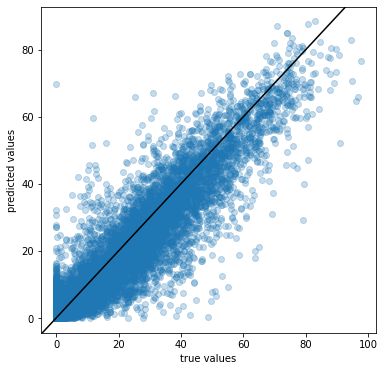

In [201]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# pH

## KSSL MIR

In [202]:
columns = []
columns.append('ph.h2o_usda.a268_index')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_usda.a268_index,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,5.67,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.86,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,6.48,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,7.54,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,8.27,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.11,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,8.17,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,8.13,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,8.44,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [203]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['ph.h2o_usda.a268_index']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.604736,-0.925828,-0.227691,-1.426952,-1.604773,0.658727,-0.319495,-0.302695,0.181576,-0.258942,...,0.004512,0.001291,-0.001374,-0.000493,0.001556,-0.002023,0.000975,-0.000292,-0.001892,-0.000631
1,-4.021881,-1.347269,-1.375903,-1.390585,-1.074192,0.693946,-0.185488,-0.051524,0.142462,-0.238465,...,0.006541,0.000294,0.000250,-0.000017,-0.000445,-0.003342,0.001828,-0.000714,-0.002149,-0.002047
2,-4.926299,0.416334,-2.391244,-1.004078,-1.572858,0.701622,-0.029762,0.212107,0.100423,-0.062127,...,0.004908,0.004376,-0.000299,-0.001481,-0.000254,-0.004054,0.001553,0.001385,-0.000439,0.002577
3,-3.549478,0.710327,-3.030013,-0.942945,-1.675591,0.222525,0.323910,0.407840,0.015901,-0.048762,...,0.004210,0.006457,-0.003678,0.001603,0.001728,-0.003255,-0.000112,-0.000479,0.000513,-0.000850
4,-1.120806,1.091576,-3.068820,-0.970478,-1.633553,0.134810,0.585318,0.296017,-0.010615,0.269604,...,0.002657,0.004426,-0.007348,0.002316,0.000935,-0.000964,-0.001662,0.000125,0.002210,-0.001935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52862,-3.034435,0.532409,-1.440441,-0.596382,-2.007506,-0.740678,0.942537,-0.029412,-0.556349,0.373908,...,-0.006217,0.006925,0.009736,-0.001941,0.002008,-0.006127,-0.000686,-0.005199,-0.000150,0.003582
52863,-2.651184,0.129587,-1.357268,-0.681218,-1.701892,-0.762061,1.083392,0.003648,-0.475435,0.372594,...,-0.006793,0.009046,0.009930,-0.001679,0.003191,-0.004612,-0.001189,-0.002088,0.000684,0.002944
52864,-3.270985,0.846587,-1.926669,-0.365822,-2.552816,-0.433544,0.707097,0.329020,-0.491187,0.198660,...,-0.006606,0.004151,0.004346,-0.000324,0.004794,-0.001313,0.002075,-0.005948,0.000315,0.002266
52865,-3.924821,2.044103,-1.367443,-1.648951,-0.988149,-2.433166,0.688362,-0.613668,-0.460995,0.319157,...,-0.011395,0.008529,-0.002683,0.000681,-0.003943,-0.007100,0.002690,0.004128,-0.003273,-0.002310


In [204]:
sum(pca.explained_variance_ratio_)

0.999987343581017

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [206]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.36311608723487715
R^2 for 1 committees: 0.7919173347375694


RMSE for 5 committees: 0.3281376370485183
R^2 for 5 committees: 0.811961638466858


RMSE for 10 committees: 0.32081904944972234
R^2 for 10 committees: 0.8161555347635235


RMSE for 15 committees: 0.32111363791037756
R^2 for 15 committees: 0.8159867216643423


RMSE for 20 committees: 0.32208709956670106
R^2 for 20 committees: 0.8154288821659024




RMSE: 0.23554290017718163
R^2: 0.86539121406568
bias: 0.35076604744530443
RPIQ: 7.945333413439874


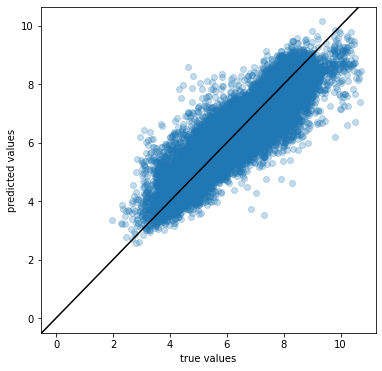

In [207]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [209]:
columns = []
columns.append('ph.h2o_iso.10390_index')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_iso.10390_index,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,4.00,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,6.53,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,7.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,4.83,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,5.74,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,6.97,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,7.79,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,7.80,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,8.05,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [210]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['ph.h2o_iso.10390_index']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.282084,0.468792,-0.099416,-0.122922,0.008270,0.060994,-0.064813,-0.018273,0.004052,0.001700,...,0.000047,3.384065e-05,1.196088e-05,0.000011,5.238026e-06,-0.000027,0.000014,-0.000048,0.000001,-0.000032
1,0.960800,-0.125627,0.005452,0.071959,-0.108119,0.059972,-0.096277,0.040820,0.007001,0.028815,...,-0.000092,1.337553e-05,-2.211669e-05,-0.000024,3.182961e-05,-0.000069,-0.000002,-0.000077,-0.000051,-0.000017
2,2.018114,0.211346,0.465043,-0.172184,-0.123954,-0.157544,0.055438,0.018517,-0.007862,0.010130,...,-0.000021,-1.643975e-05,-2.482218e-05,0.000007,7.227606e-05,0.000005,0.000058,-0.000008,0.000032,-0.000027
3,-0.532199,0.869678,0.927895,-0.026430,0.055823,-0.173424,-0.116186,-0.016011,-0.011813,-0.000320,...,0.000062,5.870816e-05,-1.285621e-04,0.000031,1.542511e-04,0.000004,0.000014,-0.000123,0.000078,-0.000102
4,1.932935,-0.266347,0.204350,-0.109689,-0.024991,0.055877,0.007002,0.009199,-0.011258,0.021262,...,-0.000065,7.262088e-09,1.152742e-06,-0.000020,-4.515583e-05,-0.000040,0.000014,-0.000024,0.000027,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40170,-2.806924,0.434093,0.537084,-0.146144,-0.243728,-0.106616,0.014965,-0.103266,0.113039,-0.039688,...,-0.000038,7.102200e-05,5.316425e-05,-0.000085,6.133836e-05,-0.000077,-0.000016,-0.000082,-0.000069,-0.000039
40171,-1.207316,-0.002321,0.583649,-0.208407,-0.276622,-0.136205,-0.013824,-0.088792,0.122823,-0.045174,...,-0.000037,2.161046e-05,3.025808e-05,-0.000093,9.666666e-05,-0.000050,0.000041,-0.000049,-0.000020,0.000005
40172,-2.954377,0.635402,0.412480,0.043823,-0.177547,-0.178759,-0.026106,-0.017539,0.038498,-0.029057,...,-0.000062,3.029115e-05,8.929008e-06,-0.000051,3.417499e-08,-0.000022,-0.000030,-0.000090,0.000015,-0.000037
40173,-2.468232,0.237416,0.005572,0.106629,-0.203854,-0.006834,-0.036128,0.046570,0.045997,-0.071390,...,-0.000219,-3.075778e-05,-6.552569e-07,-0.000061,7.043669e-05,-0.000059,-0.000093,-0.000063,-0.000053,-0.000119


In [211]:
sum(pca.explained_variance_ratio_)

0.9999999888716081

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [213]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.436544610312286
R^2 for 1 committees: 0.7566153734727666


RMSE for 5 committees: 0.38997039385751914
R^2 for 5 committees: 0.7825816733877582


RMSE for 10 committees: 0.3768661749779691
R^2 for 10 committees: 0.7898876058001384


RMSE for 15 committees: 0.37101266963431995
R^2 for 15 committees: 0.7931510826093472


RMSE for 20 committees: 0.37093385256791944
R^2 for 20 committees: 0.7931950251110221




RMSE: 0.2659278333878704
R^2: 0.854127614468415
bias: 0.39113533291273705
RPIQ: 7.651614118524381


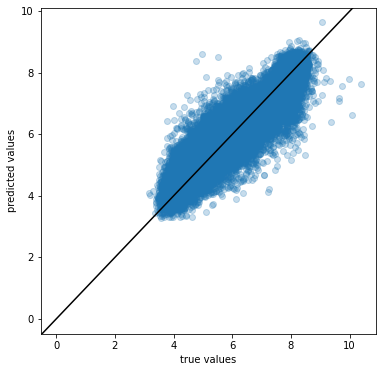

In [214]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# BULK DENSITY

## KSSL MIR

In [215]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.10815,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.31134,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.37769,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.49334,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.55718,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.36866,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.22590,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.27768,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.32984,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [216]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['bd_usda.a4_g.cm3']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-1.823368,0.047980,1.300007,0.367096,2.005683,0.387132,-0.412060,0.397015,-0.167788,0.320691,...,-0.002563,-0.004646,-0.000677,0.000447,0.001233,-0.000712,0.002276,0.003923,-0.002026,-0.001405
1,1.361743,-1.677021,1.662928,0.002768,1.874558,0.558720,-0.309029,0.122415,0.004247,0.303324,...,-0.004491,-0.006767,0.001165,0.000438,0.001852,-0.000959,0.001630,0.004830,-0.001091,-0.000489
2,1.911467,-3.040671,-0.005354,0.621643,2.109008,0.714893,-0.245047,-0.074480,0.163315,0.238437,...,0.000882,-0.003711,-0.001975,0.000772,0.002937,-0.000206,0.002555,0.005633,-0.001507,0.001956
3,0.423756,-3.451646,-0.146899,0.706796,2.231637,0.313838,0.090015,-0.294180,0.380945,0.192996,...,0.000801,-0.001418,-0.005085,-0.000140,0.003689,-0.001585,-0.000561,0.004919,-0.003157,0.000961
4,-1.991274,-3.073864,-0.356597,0.694665,2.216169,0.283949,0.401797,-0.335571,0.268953,-0.148635,...,-0.000076,0.000053,-0.004211,0.000366,0.003189,-0.001617,-0.003643,0.006277,-0.004439,-0.000840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33123,0.205202,-1.890077,-0.326520,0.934180,1.911518,-0.900598,0.733578,0.098634,0.272829,-0.870758,...,-0.002783,0.001007,-0.014531,-0.006148,0.003289,0.001713,0.006111,0.001655,-0.002654,-0.000877
33124,-0.115651,-1.692078,0.089565,0.668547,1.772400,-0.903092,0.904413,-0.030261,0.227079,-0.910646,...,0.000682,0.000473,-0.012823,-0.007106,0.005666,-0.000318,0.006730,0.001935,-0.003543,-0.001200
33125,0.336525,-2.390157,-0.561663,1.558988,2.163314,-0.619095,0.416828,-0.059743,0.595153,-0.431603,...,0.003380,0.000152,-0.006638,-0.005073,0.002119,0.004192,0.001853,0.000217,-0.001740,-0.002604
33126,0.858147,-2.348963,-1.967654,-0.901631,2.018766,-2.179594,0.580147,0.302970,-0.399733,-1.077568,...,-0.004279,0.004450,-0.010838,-0.009027,0.001939,-0.008094,-0.002390,0.005749,-0.001501,0.003611


In [217]:
sum(pca.explained_variance_ratio_)

0.9999887356889258

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [219]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.06433085167772384
R^2 for 1 committees: 0.6232527185837562


RMSE for 5 committees: 0.05005251953581472
R^2 for 5 committees: 0.7068723610621592


RMSE for 10 committees: 0.04967200279081404
R^2 for 10 committees: 0.7091008198105455


RMSE for 15 committees: 0.0494347487340349
R^2 for 15 committees: 0.7104902747697974


RMSE for 20 committees: 0.048908396454931606
R^2 for 20 committees: 0.7135728049252015




RMSE: 0.05110042126290866
R^2: 0.6978018401938157
bias: 0.163010725250572
RPIQ: 9.635631351124054


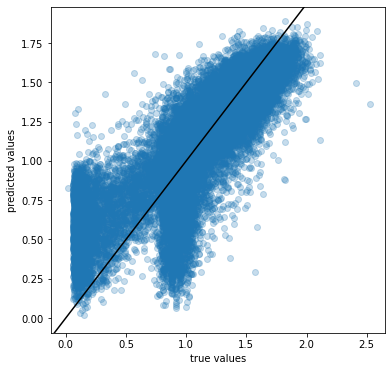

In [220]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [222]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.14756,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,1.31548,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,1.31010,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,1.13472,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,1.30826,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,1.33984,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,1.34513,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,1.31742,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.83309,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [223]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns]), columns=column_names)
y = data['bd_usda.a4_g.cm3']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,1.273842,0.036857,-0.333529,0.229000,-0.032574,0.009997,0.039956,-0.010381,-0.066731,-0.002131,...,0.000643,0.000301,-0.000441,0.000191,0.000015,0.000390,-0.000161,-0.000079,-0.000010,-0.000030
1,4.495781,0.722061,0.121335,0.262035,-0.033004,0.044009,0.050909,0.011127,-0.056575,-0.006207,...,0.000363,-0.000149,-0.000148,0.000256,-0.000047,0.000389,-0.000255,-0.000215,0.000131,0.000019
2,2.100337,0.262021,-0.091009,0.310543,-0.049237,0.003744,0.027170,-0.004900,-0.060814,-0.006155,...,0.000459,-0.000386,0.000005,0.000144,0.000280,0.000413,-0.000525,-0.000048,0.000210,-0.000020
3,-0.033498,0.273963,-0.179419,0.322822,-0.021892,0.036165,0.024586,-0.019182,-0.068458,-0.006769,...,0.000372,0.000018,-0.000116,0.000204,0.000093,0.000284,-0.000347,0.000083,0.000303,0.000085
4,-2.838730,0.878676,-0.075394,0.289465,0.005086,0.079750,-0.013304,-0.110314,-0.113869,0.002621,...,0.000254,0.000151,-0.000340,0.000162,-0.000005,0.000601,-0.000313,0.000030,-0.000083,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19747,-3.393393,-0.810963,0.051650,-0.115321,0.170797,-0.100574,0.171387,0.090214,-0.073174,-0.038906,...,-0.000320,-0.000068,0.000167,0.000009,0.000265,0.000071,0.000037,0.000054,0.000149,-0.000226
19748,-1.523025,-0.851226,0.020977,0.091646,0.087754,-0.071587,0.229539,0.033966,-0.054652,-0.026474,...,-0.000387,-0.000164,0.000292,-0.000133,0.000265,-0.000199,-0.000027,-0.000152,0.000302,-0.000077
19749,-2.002253,-1.076834,-0.188140,0.140747,0.063708,-0.078468,0.237462,0.002739,-0.037025,-0.020074,...,0.000173,0.000091,0.000207,0.000002,0.000163,-0.000434,-0.000049,-0.000185,0.000032,-0.000115
19750,2.801092,0.071618,0.228001,0.250850,-0.093755,-0.026144,0.000965,0.031664,-0.035940,-0.016362,...,-0.000019,-0.000033,0.000303,0.000428,-0.000246,0.000176,-0.000102,-0.000052,-0.000251,0.000098


In [224]:
sum(pca.explained_variance_ratio_)

0.9999996418105177

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [226]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.08495520815131417
R^2 for 1 committees: 0.5312983946025429


RMSE for 5 committees: 0.0774762098064506
R^2 for 5 committees: 0.5725603561383085


RMSE for 10 committees: 0.07518165030178524
R^2 for 10 committees: 0.5852195414539532


RMSE for 15 committees: 0.07430490013748535
R^2 for 15 committees: 0.5900566105222547


RMSE for 20 committees: 0.07395734243886669
R^2 for 20 committees: 0.5919741015726052




RMSE: 0.0719524616984967
R^2: 0.5881811117166121
bias: 0.2062366888335257
RPIQ: 7.385820885424461


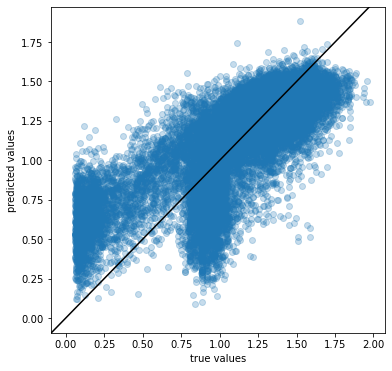

In [227]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ELECTRICAL CONDUCTIVITY

## KSSL MIR

In [229]:
columns = []
columns.append('ec_usda.a364_ds.m')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_usda.a364_ds.m,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7901,2.20,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,3.24,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
7903,9.14,1.51638,1.52640,1.53808,1.55170,1.57853,1.59319,1.60908,1.62206,1.63456,...,0.19585,0.19552,0.19532,0.19515,0.19490,0.19467,0.19438,0.19408,0.19375,0.19348
7905,2.64,1.45608,1.46058,1.46790,1.47800,1.49969,1.51299,1.52768,1.53954,1.55004,...,0.21283,0.21258,0.21242,0.21230,0.21205,0.21180,0.21160,0.21133,0.21108,0.21085
7906,3.53,1.50898,1.51235,1.51772,1.52475,1.54024,1.54961,1.55875,1.56521,1.57052,...,0.18675,0.18645,0.18632,0.18612,0.18575,0.18540,0.18505,0.18478,0.18455,0.18428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.12,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.11,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.12,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.24,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [230]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['ec_usda.a364_ds.m']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,2.336068,2.946192,-1.357460,0.319200,0.488194,0.004203,-0.161496,-0.068166,0.419941,-0.305052,...,-0.004025,-0.002932,-0.002821,0.002492,0.000184,0.002531,0.007017,-0.000568,-0.000342,0.000535
1,3.569515,4.241757,-1.498073,1.060048,-0.067675,0.360074,0.286213,0.306202,0.734541,0.248737,...,0.002801,-0.006914,-0.000535,-0.001912,-0.003314,-0.000397,0.013434,-0.002384,-0.000459,0.000271
2,2.379958,3.394622,-1.569425,-0.041144,0.348452,1.240378,-0.059453,0.024631,-0.498703,0.047659,...,0.006135,-0.007343,0.004864,-0.000474,-0.002754,0.000630,0.009335,0.003358,-0.001951,0.000429
3,3.053526,0.809820,-2.098378,-0.049906,0.806610,0.976198,0.616142,0.098162,-0.007149,0.128901,...,-0.006325,-0.003493,-0.000414,-0.002451,-0.001981,-0.002199,0.012274,-0.003913,-0.000624,-0.000068
4,2.740951,0.829583,-1.450565,-0.113415,0.612634,0.392359,0.317135,0.884011,-0.331708,0.117324,...,-0.000593,0.002956,0.003793,-0.003212,-0.006074,-0.005402,0.009358,0.000104,-0.008273,0.003180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31881,-2.816791,0.426208,-1.599283,1.180255,1.137747,-1.013172,0.843099,-0.007038,-0.579787,-0.590522,...,-0.005032,0.002870,-0.007653,0.003781,-0.001915,-0.004899,-0.001395,0.007933,-0.002253,-0.002605
31882,-2.436914,0.054226,-1.493053,0.839400,1.067824,-0.958336,0.994162,0.016866,-0.495520,-0.687101,...,-0.004015,0.002078,-0.007622,0.000815,-0.002626,-0.001832,-0.000200,0.008350,-0.003975,-0.003204
31883,-3.040802,0.642773,-2.085508,1.850724,1.294394,-0.837273,0.548612,0.381437,-0.561621,-0.021000,...,-0.005277,0.003546,-0.001916,0.002017,-0.003846,-0.002879,0.000409,0.002569,0.000181,-0.001691
31884,-3.696610,2.206820,-1.633620,-0.414938,0.902133,-2.355875,0.740393,-0.591216,-0.340630,-1.214250,...,0.007298,0.002826,-0.002360,0.001134,0.002172,0.001269,-0.006469,-0.002010,-0.000216,-0.001570


In [231]:
sum(pca.explained_variance_ratio_)

0.999988038253679

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [233]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 127.08124822633384
R^2 for 1 committees: 0.3203211176418883


RMSE for 5 committees: 97.53417202206126
R^2 for 5 committees: 0.4783501267345802


RMSE for 10 committees: 92.87761658570324
R^2 for 10 committees: 0.5032551574829842


RMSE for 15 committees: 91.79969106006827
R^2 for 15 committees: 0.5090203134501652


RMSE for 20 committees: 91.95598762505601
R^2 for 20 committees: 0.5081843799344817




RMSE: 46.11728467382887
R^2: 0.697153230105118
bias: 1.7144119272074232
RPIQ: 0.024095120922028736


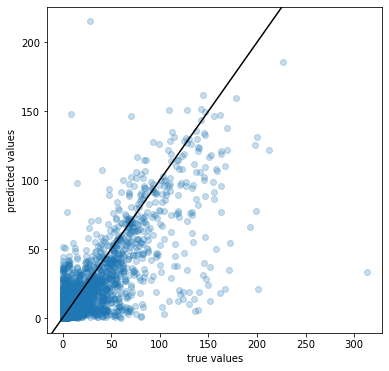

In [234]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [236]:
columns = []
columns.append('ec_iso.11265_ds.m')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_iso.11265_ds.m,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
113869,0.1814,0.173346,0.159692,0.147878,0.138147,0.130453,0.124555,0.120148,0.116944,0.114679,...,0.344580,0.344050,0.343513,0.343058,0.342691,0.342355,0.342048,0.341837,0.341747,0.341728
113870,0.1481,0.251348,0.232561,0.216216,0.202723,0.191893,0.183363,0.176812,0.171901,0.168282,...,0.475101,0.474677,0.474293,0.473987,0.473781,0.473655,0.473584,0.473643,0.473838,0.474198
113871,0.2810,0.161221,0.148654,0.137825,0.128942,0.121964,0.116652,0.112707,0.109858,0.107865,...,0.273004,0.272162,0.271325,0.270574,0.269921,0.269343,0.268824,0.268344,0.267915,0.267430
113872,0.0537,0.186592,0.170279,0.156208,0.144598,0.135380,0.128286,0.122970,0.119066,0.116230,...,0.441528,0.441024,0.440526,0.440109,0.439803,0.439550,0.439345,0.439247,0.439261,0.439353
113873,0.2160,0.173072,0.159340,0.147474,0.137704,0.129969,0.124029,0.119585,0.116345,0.114038,...,0.344269,0.343284,0.342273,0.341352,0.340577,0.339950,0.339486,0.339197,0.339042,0.338915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.2110,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.1084,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.1509,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.1550,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [237]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['ec_iso.11265_ds.m']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.422596,0.134490,-0.038522,0.001079,-0.192834,0.011613,0.025864,-0.018886,0.032161,-0.022442,...,-0.000005,0.000040,0.000018,0.000027,-0.000018,-0.000003,-7.913045e-05,-3.164378e-05,0.000027,0.000012
1,3.691561,0.086994,-0.156663,-0.134940,-0.173462,0.117622,0.145640,-0.025887,0.055746,0.037916,...,0.000020,-0.000122,-0.000052,0.000020,0.000027,0.000098,-8.911698e-05,-8.287150e-05,0.000002,-0.000120
2,-1.896838,0.594557,0.271699,-0.003614,-0.127133,-0.051689,0.034530,-0.020341,0.012990,-0.018126,...,-0.000011,-0.000019,0.000092,-0.000036,-0.000025,-0.000040,2.317187e-06,2.337073e-05,0.000038,-0.000009
3,1.668370,-0.502664,-0.319156,-0.240770,-0.251617,0.000651,-0.005066,-0.023253,0.052399,-0.010154,...,-0.000011,0.000073,0.000080,0.000049,-0.000031,-0.000027,-5.895416e-05,-1.729651e-07,-0.000050,0.000018
4,-0.542635,0.150496,-0.135885,-0.136834,-0.184487,-0.040863,-0.094323,-0.109360,0.019731,-0.010839,...,0.000011,-0.000037,0.000017,-0.000005,0.000042,0.000087,-6.839050e-05,-9.826113e-05,-0.000090,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,-2.640006,0.405543,0.541014,-0.185362,-0.234542,-0.121801,0.009870,-0.089450,0.111170,-0.029787,...,0.000158,0.000043,-0.000022,-0.000048,-0.000021,0.000105,2.328387e-07,-2.743514e-05,-0.000014,-0.000033
21778,-1.032835,-0.001017,0.578075,-0.259621,-0.266279,-0.152896,-0.020259,-0.071831,0.116656,-0.025119,...,0.000165,0.000018,-0.000042,-0.000045,0.000048,0.000071,5.848065e-06,2.577740e-06,-0.000006,-0.000056
21779,-2.791254,0.600855,0.424844,0.014024,-0.164900,-0.193408,-0.034346,-0.008013,0.040452,-0.021539,...,0.000097,0.000004,-0.000047,-0.000007,-0.000053,0.000072,-7.996118e-06,4.663270e-05,-0.000006,0.000033
21780,-2.298545,0.213831,0.018706,0.091451,-0.201995,-0.019824,-0.043477,0.052722,0.048321,-0.063304,...,0.000115,0.000032,-0.000005,-0.000097,-0.000088,0.000073,6.494736e-05,-3.177646e-05,-0.000060,0.000055


In [238]:
sum(pca.explained_variance_ratio_)

0.9999999891260049

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [240]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.12020222619192829
R^2 for 1 committees: -0.09608847779539076


RMSE for 5 committees: 0.08569512383086168
R^2 for 5 committees: 0.21857156219154816


RMSE for 10 committees: 0.07981999704226786
R^2 for 10 committees: 0.27214510223799004


RMSE for 15 committees: 0.07934316680658972
R^2 for 15 committees: 0.2764931758448528


RMSE for 20 committees: 0.079190222260268
R^2 for 20 committees: 0.2778878318364746




RMSE: 0.06495360040552259
R^2: 0.4166703151766651
bias: 0.12893260166026804
RPIQ: 1.7088239530337876


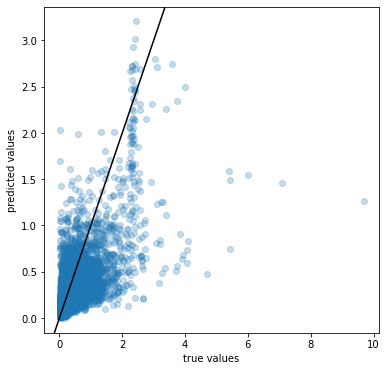

In [241]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CATION EXCHANGE CAPACITY

## KSSL MIR

In [242]:
columns = []
columns.append('cec_usda.a723_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_usda.a723_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,21.38778,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,24.12791,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,30.03881,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,28.14704,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,21.75416,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,17.55256,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,15.46190,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,22.76420,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,25.26591,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [243]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['cec_usda.a723_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.494573,-0.810884,-0.233650,-1.414615,1.659110,0.568682,-0.323338,-0.296110,0.145387,-0.268282,...,0.004450,0.001808,-0.000556,-0.000416,0.000645,-0.003410,-0.000624,-0.000040,-0.002090,-0.001236
1,-3.900630,-1.245333,-1.425425,-1.383658,1.167555,0.646223,-0.191747,-0.049723,0.094481,-0.234698,...,0.005526,0.000584,0.001306,0.000082,-0.001137,-0.004125,0.000469,-0.000416,-0.002095,-0.002218
2,-4.784154,0.500083,-2.470036,-0.963111,1.672357,0.648184,-0.026376,0.220358,0.056079,-0.058417,...,0.004434,0.004414,0.001567,-0.001196,-0.001427,-0.004358,0.000592,0.002059,-0.000356,0.001883
3,-3.400661,0.765986,-3.097997,-0.873320,1.776687,0.172059,0.343670,0.405642,-0.032165,-0.044724,...,0.004011,0.006896,-0.001495,0.002041,-0.000040,-0.003398,-0.001877,0.000112,-0.000405,-0.000384
4,-0.969522,1.129160,-3.118585,-0.892574,1.735058,0.080025,0.608905,0.304133,-0.025531,0.274844,...,0.003296,0.006148,-0.005683,0.003563,-0.000165,-0.000874,-0.002360,-0.000205,0.001283,-0.002164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53222,-2.906300,0.621678,-1.492025,-0.494837,2.005128,-0.791039,0.960456,-0.057206,-0.544911,0.375168,...,-0.005224,0.006664,0.011088,-0.001004,0.001138,-0.004270,-0.005400,-0.004954,0.001373,0.002516
53223,-2.526058,0.215142,-1.404915,-0.587080,1.702288,-0.800096,1.100606,-0.021270,-0.467354,0.367330,...,-0.005482,0.009310,0.011359,-0.000413,0.002820,-0.003012,-0.005174,-0.002202,0.002150,0.001343
53224,-3.136681,0.931352,-1.966835,-0.259004,2.571747,-0.499322,0.727920,0.297592,-0.521062,0.208062,...,-0.005209,0.004371,0.005020,-0.000959,0.005008,-0.002379,-0.001724,-0.005755,0.000451,0.002383
53225,-3.787202,2.126298,-1.522298,-1.505873,0.925065,-2.488363,0.734441,-0.613877,-0.380039,0.310920,...,-0.011039,0.011228,0.000496,0.003782,-0.007088,-0.004458,0.001534,0.003369,-0.002699,-0.004096


In [244]:
sum(pca.explained_variance_ratio_)

0.9999876991450556

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [246]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 67.45833007778714
R^2 for 1 committees: 0.8696922823799841


RMSE for 5 committees: 45.28971049506347
R^2 for 5 committees: 0.9125148992055127


RMSE for 10 committees: 44.06039984743959
R^2 for 10 committees: 0.9148895305453804


RMSE for 15 committees: 43.25761722449496
R^2 for 15 committees: 0.9164402474282367


RMSE for 20 committees: 43.377766031977956
R^2 for 20 committees: 0.9162081587171789




RMSE: 40.371978177475604
R^2: 0.9271725851205836
bias: 2.524010679416543
RPIQ: 0.4081480720046964


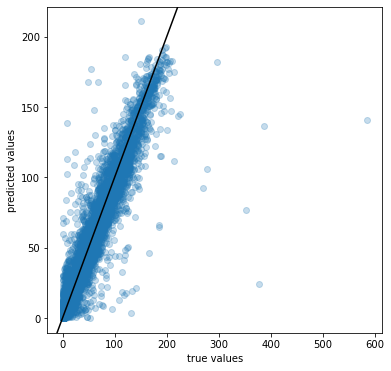

In [247]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [249]:
columns = []
columns.append('cec_iso.11260_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_iso.11260_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,24.6,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,20.6,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,15.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113864,9.7,0.245015,0.224416,0.206519,0.191577,0.179569,0.170252,0.163268,0.158218,0.154717,...,0.458799,0.458305,0.457847,0.457396,0.456953,0.456555,0.456244,0.456026,0.455895,0.455810
113865,7.2,0.204041,0.186489,0.171210,0.158381,0.147981,0.139833,0.133658,0.129136,0.125906,...,0.427798,0.427246,0.426737,0.426303,0.425913,0.425548,0.425225,0.424973,0.424812,0.424725
113866,7.7,0.202215,0.186067,0.171907,0.159955,0.150233,0.142605,0.136818,0.132574,0.129538,...,0.398189,0.397701,0.397237,0.396807,0.396417,0.396091,0.395835,0.395633,0.395486,0.395359
113867,12.6,0.213318,0.195800,0.180749,0.168387,0.158611,0.151115,0.145547,0.141550,0.138797,...,0.395874,0.395001,0.394189,0.393430,0.392743,0.392145,0.391597,0.391107,0.390716,0.390309


In [250]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['cec_iso.11260_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.479768,0.500458,-0.111170,-0.115362,0.013399,0.056220,-0.059675,-0.014303,0.005740,0.004466,...,-1.383434e-05,0.000006,0.000038,-2.007735e-05,0.000053,-0.000088,0.000023,-0.000028,-1.772542e-05,0.000002
1,0.752166,-0.158640,0.001889,0.100366,-0.108056,0.075194,-0.085703,0.045695,0.024644,-0.012078,...,-6.410418e-05,-0.000031,0.000069,-3.987571e-05,0.000050,0.000034,0.000049,-0.000034,5.922123e-05,0.000037
2,1.814405,0.158711,0.472236,-0.125991,-0.131699,-0.142311,0.060611,-0.002245,-0.002089,-0.009934,...,-6.736701e-05,-0.000055,0.000060,-2.347040e-05,-0.000007,-0.000030,0.000017,-0.000031,1.337160e-05,-0.000014
3,-0.725511,0.869348,0.916266,0.020353,0.042850,-0.160367,-0.117881,-0.007200,-0.019098,-0.010374,...,-9.569407e-05,-0.000019,0.000065,-8.794231e-05,0.000009,-0.000089,0.000018,0.000038,8.970125e-05,0.000015
4,1.721290,-0.318978,0.212654,-0.066176,-0.024617,0.065515,0.009835,-0.003807,0.009235,-0.019129,...,-5.678319e-05,0.000032,-0.000023,4.117464e-05,0.000043,-0.000037,0.000014,0.000056,-1.573025e-05,-0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,2.750008,0.219768,-0.203872,-0.123882,-0.135846,-0.010475,0.048056,0.008100,-0.025557,-0.030616,...,4.629969e-05,-0.000046,-0.000006,-3.603383e-05,0.000057,-0.000034,0.000048,0.000034,-7.412132e-05,0.000017
18389,1.284756,-0.137653,-0.205089,-0.266989,-0.201115,-0.047384,-0.025470,-0.010647,0.008068,0.020741,...,5.696278e-07,-0.000021,0.000016,-1.124033e-04,-0.000072,0.000013,0.000054,0.000006,1.743147e-05,-0.000035
18390,0.490266,0.133918,-0.209495,-0.144418,-0.176361,-0.023957,-0.010521,-0.016165,0.008777,0.015737,...,2.169177e-05,0.000005,-0.000065,2.641283e-07,-0.000002,-0.000022,0.000019,-0.000040,3.020366e-05,-0.000014
18391,1.999234,-0.134369,0.272098,-0.017546,-0.070676,0.067550,-0.096141,0.031460,0.009255,-0.017032,...,8.703556e-06,-0.000012,0.000016,-8.752130e-06,0.000056,-0.000049,-0.000014,0.000076,-4.717513e-06,0.000001


In [251]:
sum(pca.explained_variance_ratio_)

0.9999999922612786

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [253]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 100.0531587940758
R^2 for 1 committees: 0.4281674998811358


RMSE for 5 committees: 74.47159900657493
R^2 for 5 committees: 0.5743734514626762


RMSE for 10 committees: 73.10000992183473
R^2 for 10 committees: 0.5822124764861338


RMSE for 15 committees: 71.2632343005515
R^2 for 15 committees: 0.5927101759924283


RMSE for 20 committees: 71.17367110515715
R^2 for 20 committees: 0.5932220553429481




RMSE: 53.39022714466316
R^2: 0.7321485446328146
bias: 4.183846351538393
RPIQ: 0.22130676618025455


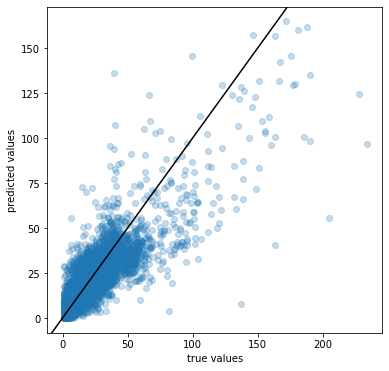

In [254]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# WATER RETENTION

## KSSL MIR

In [255]:
columns = []
columns.append('wr.1500kPa_usda.a417_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,wr.1500kPa_usda.a417_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,14.53674,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,16.20553,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,20.42360,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,17.88413,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,15.64417,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.73656,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,7.47283,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,11.14600,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,15.84158,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [256]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['wr.1500kPa_usda.a417_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.473392,-1.060188,-0.359042,-1.275321,1.792135,0.610530,-0.384341,-0.305559,0.255097,-0.031354,...,0.003370,0.000255,0.000247,-0.001009,-0.001413,-0.000659,0.000064,-0.002414,0.001513,0.000019
1,-3.938292,-1.354410,-1.295235,-1.283114,1.109967,0.668858,-0.225745,-0.041315,0.170223,0.036294,...,0.003653,0.001221,-0.001521,-0.001025,-0.001906,0.003207,0.000025,-0.003344,0.001758,-0.002846
2,-4.801290,0.408013,-2.357901,-0.757734,1.418728,0.631784,-0.089180,0.243071,0.078789,0.198764,...,0.005080,-0.002232,0.001234,-0.002034,-0.002905,0.001455,0.001351,0.000473,0.003834,-0.000227
3,-3.428589,0.645955,-3.036574,-0.692921,1.359782,0.152064,0.245379,0.454895,-0.041291,0.223395,...,0.006868,-0.001311,0.005164,0.000172,-0.003830,-0.000799,0.001119,-0.000984,0.000527,-0.001468
4,-0.989351,0.946607,-3.135764,-0.717903,1.283269,0.083914,0.491754,0.317912,-0.087408,0.356945,...,0.004301,0.001491,0.005733,0.000419,-0.001675,-0.000754,0.000179,0.000911,-0.000990,0.000727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40279,-2.867636,0.442762,-1.517380,-0.402547,1.891862,-0.864898,0.832682,-0.132899,-0.538070,-0.154484,...,0.005741,-0.009898,-0.003440,-0.000048,-0.007002,-0.000505,-0.004488,-0.001983,0.003660,0.000635
40280,-2.498915,0.037028,-1.390949,-0.537893,1.605488,-0.863323,0.977629,-0.106490,-0.457882,-0.222564,...,0.005528,-0.012511,-0.003709,0.001118,-0.006183,-0.002437,-0.003604,0.000701,0.002105,0.000690
40281,-3.102878,0.735185,-2.083310,-0.080600,2.335948,-0.599692,0.583716,0.291639,-0.497594,0.104655,...,0.001810,-0.006632,-0.000415,0.001202,-0.002921,-0.003951,0.000207,-0.005542,0.003226,-0.000615
40282,-3.705040,2.064472,-1.281429,-1.582643,0.938993,-2.433967,0.615411,-0.776995,-0.417134,-0.754513,...,-0.002735,-0.008764,0.006115,-0.003372,-0.006629,0.005113,0.002392,0.003430,-0.003159,-0.001025


In [257]:
sum(pca.explained_variance_ratio_)

0.9999871257492006

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [259]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 63.55031263577691
R^2 for 1 committees: 0.7537221853832783


RMSE for 5 committees: 48.02254777605893
R^2 for 5 committees: 0.8138972472661492


RMSE for 10 committees: 44.846444707470425
R^2 for 10 committees: 0.8262056638621847


RMSE for 15 committees: 45.21618670509809
R^2 for 15 committees: 0.8247727952047219


RMSE for 20 committees: 44.0076176071335
R^2 for 20 committees: 0.8294563875257526




RMSE: 37.408913351932014
R^2: 0.8579954327909283
bias: 2.5010326283920947
RPIQ: 0.2508033095904745


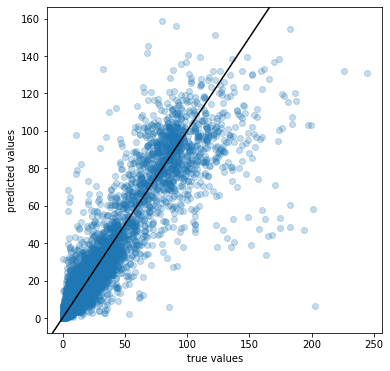

In [260]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# NITROGEN

## KSSL MIR

In [4]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.30898,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.15974,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.08458,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.08744,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.03378,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.06953,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.07152,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.08750,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.05180,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [5]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['n.tot_usda.a623_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,0.554039,-0.706283,-0.530058,-1.343269,-1.750357,0.463537,-0.327409,-0.342832,-0.128236,0.287131,...,0.000538,0.001522,0.001921,0.003608,0.001663,-0.001826,-0.001342,0.002842,0.000452,0.000143
1,-2.729717,-0.565220,-2.107751,-1.429175,-1.392940,0.604437,-0.205846,-0.078131,-0.040496,0.241859,...,-0.000242,0.002248,0.001988,0.004149,0.002352,-0.001973,-0.000830,0.002067,0.002053,-0.000138
2,-3.444532,1.467425,-2.632171,-1.081528,-1.937425,0.714408,-0.061929,0.196628,0.059385,0.093788,...,0.000264,0.000573,0.000722,0.005283,0.000342,-0.002694,-0.000343,0.002645,0.003962,0.001263
3,-1.996769,1.823104,-3.040783,-1.003225,-2.094886,0.299390,0.314918,0.410546,0.186928,0.061888,...,-0.001654,-0.002278,0.001213,0.007899,0.001567,0.000187,-0.001587,0.003039,0.003500,0.000706
4,0.432606,2.015467,-2.740953,-1.014513,-2.052961,0.231447,0.598942,0.400213,0.090111,-0.280470,...,-0.001162,-0.002616,0.001363,0.007783,0.004402,0.002025,-0.005053,0.003453,0.000049,0.000800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76589,-1.665511,1.249269,-1.568279,-0.467521,-2.115663,-0.760705,0.907403,-0.051367,0.421848,-0.677732,...,-0.009322,-0.004930,-0.000419,0.005917,-0.015094,-0.007568,-0.005569,-0.000784,-0.002999,0.003849
76590,-1.312302,0.806747,-1.585595,-0.562061,-1.824976,-0.774677,1.056477,0.026806,0.353010,-0.674453,...,-0.008474,-0.004987,0.000661,0.008752,-0.014054,-0.006564,-0.003650,0.000720,-0.004587,0.002761
76591,-1.842090,1.690425,-1.896054,-0.241509,-2.711506,-0.427405,0.663847,0.217848,0.573279,-0.392600,...,-0.003970,-0.001716,0.001238,0.001405,-0.010858,-0.002932,-0.004702,-0.001506,-0.002464,0.000714
76592,-2.446959,2.786533,-1.381663,-1.528575,-1.047171,-2.478793,0.732646,-0.417386,0.001633,-0.726323,...,-0.014370,-0.014631,-0.003184,0.008919,0.000987,0.001122,-0.002114,0.002853,0.003987,0.002106


In [6]:
sum(pca.explained_variance_ratio_)

0.9999875533146231

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [8]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.06868148113598323
R^2 for 1 committees: 0.810168704250956


RMSE for 5 committees: 0.039423573732038086
R^2 for 5 committees: 0.8910357208256262


RMSE for 10 committees: 0.03546392738815465
R^2 for 10 committees: 0.9019799343710377


RMSE for 15 committees: 0.035210117703477095
R^2 for 15 committees: 0.9026814483820795


RMSE for 20 committees: 0.03479112126849704
R^2 for 20 committees: 0.9038395281854114




RMSE: 0.08301304693607683
R^2: 0.8111631425098944
bias: 0.06442681412348374
RPIQ: 3.0306603305687156


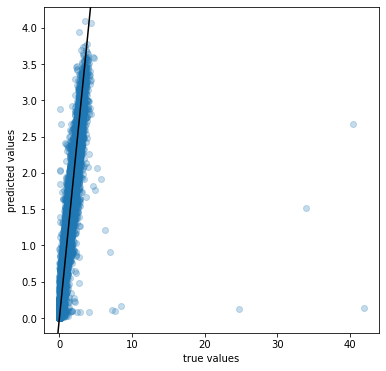

In [9]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [10]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,0.20601,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,0.22330,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,0.14873,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,0.10968,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,0.03284,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.08415,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,0.15948,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.07306,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.47058,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [11]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns]), columns=column_names)
y = data['n.tot_usda.a623_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,1.268674,0.036674,-0.332877,0.228876,-0.032381,0.009985,0.040012,-0.010385,-0.066660,-0.002205,...,0.000623,0.000310,-0.000456,0.000195,-0.000035,0.000425,-0.000122,0.000011,0.000052,0.000032
1,4.490525,0.721993,0.122439,0.261922,-0.032866,0.044007,0.050994,0.011145,-0.056498,-0.006303,...,0.000348,-0.000137,-0.000151,0.000252,-0.000076,0.000440,-0.000240,-0.000176,0.000133,0.000037
2,2.095124,0.261891,-0.090263,0.310455,-0.049045,0.003753,0.027240,-0.004846,-0.060736,-0.006244,...,0.000450,-0.000376,-0.000011,0.000145,0.000252,0.000401,-0.000518,-0.000043,0.000174,0.000071
3,-0.038696,0.273789,-0.179044,0.322712,-0.021656,0.036175,0.024606,-0.019130,-0.068340,-0.006850,...,0.000373,0.000036,-0.000129,0.000205,0.000104,0.000301,-0.000351,0.000075,0.000318,0.000038
4,-2.843955,0.878478,-0.075579,0.289353,0.005323,0.079726,-0.013452,-0.110222,-0.113616,0.002591,...,0.000250,0.000159,-0.000348,0.000125,0.000004,0.000583,-0.000377,-0.000013,-0.000139,0.000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19801,-3.398616,-0.811196,0.051721,-0.115373,0.170820,-0.100548,0.171558,0.089962,-0.073171,-0.038984,...,-0.000324,-0.000059,0.000148,0.000061,0.000260,0.000058,0.000100,0.000126,0.000266,-0.000057
19802,-1.528243,-0.851414,0.021324,0.091622,0.087852,-0.071516,0.229658,0.033698,-0.054619,-0.026573,...,-0.000381,-0.000156,0.000255,-0.000138,0.000297,-0.000226,0.000046,-0.000146,0.000269,-0.000061
19803,-2.007431,-1.077054,-0.187856,0.140720,0.063851,-0.078400,0.237547,0.002478,-0.036981,-0.020166,...,0.000173,0.000114,0.000187,0.000026,0.000150,-0.000450,-0.000033,-0.000140,0.000119,-0.000098
19804,2.795826,0.071536,0.228901,0.250849,-0.093651,-0.026127,0.001098,0.031762,-0.035909,-0.016451,...,-0.000021,-0.000012,0.000301,0.000428,-0.000271,0.000185,-0.000071,-0.000062,-0.000083,-0.000224


In [12]:
sum(pca.explained_variance_ratio_)

0.9999996428792413

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [14]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.1444889491093747
R^2 for 1 committees: 0.7519553930004557


RMSE for 5 committees: 0.08338715249013462
R^2 for 5 committees: 0.8568490282771077


RMSE for 10 committees: 0.08045781237581053
R^2 for 10 committees: 0.8618778351298415


RMSE for 15 committees: 0.07883071148366247
R^2 for 15 committees: 0.864671084051847


RMSE for 20 committees: 0.07797880883934971
R^2 for 20 committees: 0.8661335478451886




RMSE: 0.06726899552160943
R^2: 0.8811740151440792
bias: 0.14376891751719406
RPIQ: 11.94740116414322


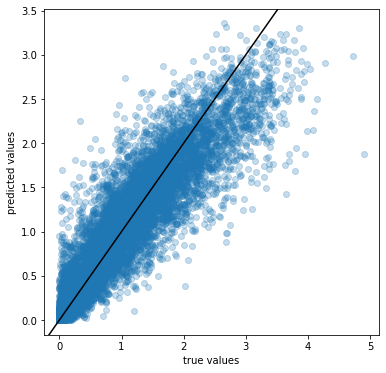

In [15]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [16]:
columns = []
columns.append('n.tot_iso.11261_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_iso.11261_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.53,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.21,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.16,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.26,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.13,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.13,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.09,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.06,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [17]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['n.tot_iso.11261_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.282084,0.468792,-0.099416,-0.122922,0.008270,0.060994,-0.064813,-0.018273,0.004052,0.001700,...,0.000047,3.148661e-05,0.000010,0.000012,0.000005,-0.000024,1.560426e-05,-0.000051,-0.000002,-0.000022
1,0.960800,-0.125627,0.005452,0.071959,-0.108119,0.059972,-0.096277,0.040820,0.007001,0.028815,...,-0.000093,1.265925e-05,-0.000022,-0.000024,0.000033,-0.000069,4.080016e-07,-0.000075,-0.000051,-0.000015
2,2.018114,0.211346,0.465043,-0.172184,-0.123954,-0.157544,0.055438,0.018517,-0.007862,0.010130,...,-0.000022,-1.572577e-05,-0.000025,0.000006,0.000075,0.000007,5.805662e-05,-0.000005,0.000034,-0.000027
3,-0.532199,0.869678,0.927895,-0.026430,0.055823,-0.173424,-0.116186,-0.016011,-0.011813,-0.000320,...,0.000062,6.018006e-05,-0.000129,0.000027,0.000159,0.000003,1.109851e-05,-0.000116,0.000081,-0.000101
4,1.932935,-0.266347,0.204350,-0.109689,-0.024991,0.055877,0.007002,0.009199,-0.011258,0.021262,...,-0.000065,1.479665e-06,0.000003,-0.000021,-0.000045,-0.000044,1.098821e-05,-0.000021,0.000029,-0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40170,-2.806924,0.434093,0.537084,-0.146144,-0.243728,-0.106616,0.014965,-0.103266,0.113039,-0.039688,...,-0.000038,7.274720e-05,0.000053,-0.000086,0.000060,-0.000073,-1.558403e-05,-0.000080,-0.000070,-0.000032
40171,-1.207316,-0.002321,0.583649,-0.208407,-0.276622,-0.136205,-0.013824,-0.088792,0.122823,-0.045174,...,-0.000037,2.147481e-05,0.000032,-0.000093,0.000093,-0.000046,4.216274e-05,-0.000048,-0.000024,0.000010
40172,-2.954377,0.635402,0.412480,0.043823,-0.177547,-0.178759,-0.026106,-0.017539,0.038498,-0.029057,...,-0.000062,2.941547e-05,0.000007,-0.000052,0.000001,-0.000019,-2.828422e-05,-0.000092,0.000015,-0.000026
40173,-2.468232,0.237416,0.005572,0.106629,-0.203854,-0.006834,-0.036128,0.046570,0.045997,-0.071390,...,-0.000219,-2.711390e-05,0.000002,-0.000061,0.000072,-0.000061,-9.709989e-05,-0.000065,-0.000052,-0.000126


In [18]:
sum(pca.explained_variance_ratio_)

0.9999999888734236

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [20]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.04534992856617189
R^2 for 1 committees: 0.6013738628914238


RMSE for 5 committees: 0.027103334093391405
R^2 for 5 committees: 0.7617615349350089


RMSE for 10 committees: 0.026372393426794698
R^2 for 10 committees: 0.7681865076658007


RMSE for 15 committees: 0.025739452418862795
R^2 for 15 committees: 0.7737500628242471


RMSE for 20 committees: 0.025236361840228348
R^2 for 20 committees: 0.7781722319503603




RMSE: 0.01651744498664378
R^2: 0.8784492188233266
bias: 0.07069054187249955
RPIQ: 9.938884338242145


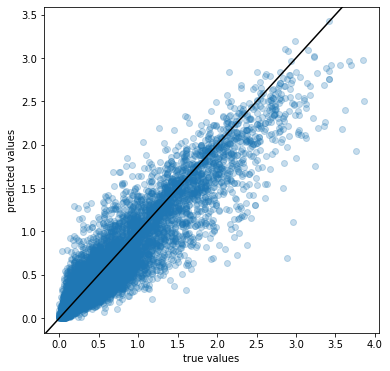

In [21]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM

## KSSL MIR

In [22]:
columns = []
columns.append('ca.ext_usda.a722_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ca.ext_usda.a722_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,13.88126,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,15.72011,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,21.14528,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,29.25669,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,34.91432,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,40.35338,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,40.39062,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,25.29846,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,57.57273,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [23]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['ca.ext_usda.a722_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.494467,-0.810452,-0.233684,-1.414338,1.659807,0.568271,-0.323255,-0.296117,0.145096,-0.266846,...,0.004350,0.001927,-0.000569,-0.000354,0.000544,-0.003438,-0.000630,0.000083,-0.002330,-0.000958
1,-3.900512,-1.245104,-1.425375,-1.383679,1.168145,0.645895,-0.191714,-0.049669,0.094262,-0.232539,...,0.005459,0.000715,0.001325,0.000216,-0.001301,-0.004222,0.000541,-0.000295,-0.002061,-0.002224
2,-4.783999,0.500086,-2.470410,-0.962866,1.672630,0.647320,-0.026490,0.220596,0.055926,-0.055822,...,0.004342,0.004513,0.001629,-0.001115,-0.001563,-0.004317,0.000586,0.002231,-0.000141,0.001856
3,-3.400501,0.765802,-3.098367,-0.873074,1.776681,0.171027,0.343534,0.405952,-0.032202,-0.042039,...,0.003811,0.007015,-0.001468,0.002101,-0.000118,-0.003427,-0.001820,0.000244,-0.000349,-0.000495
4,-0.969357,1.128945,-3.118976,-0.892289,1.735016,0.078959,0.608765,0.304462,-0.025581,0.276624,...,0.003227,0.006214,-0.005676,0.003540,-0.000093,-0.000813,-0.002246,-0.000129,0.001196,-0.002399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53227,-2.906159,0.621627,-1.492403,-0.494239,2.005001,-0.791696,0.960540,-0.056942,-0.544797,0.371715,...,-0.005574,0.006606,0.011053,-0.000893,0.000906,-0.004685,-0.005307,-0.005157,0.001197,0.001835
53228,-2.525923,0.215102,-1.405178,-0.586595,1.702222,-0.800574,1.100714,-0.021092,-0.467164,0.363344,...,-0.005828,0.009224,0.011338,-0.000372,0.002754,-0.003300,-0.004977,-0.002520,0.001511,0.000793
53229,-3.136526,0.931235,-1.967356,-0.258322,2.571515,-0.500424,0.727816,0.298055,-0.521002,0.208077,...,-0.005489,0.004324,0.005001,-0.000913,0.004882,-0.002792,-0.001803,-0.005904,0.000181,0.002269
53230,-3.787090,2.126176,-1.522538,-1.505367,0.924658,-2.488560,0.735018,-0.614163,-0.379857,0.302322,...,-0.011221,0.010983,0.000533,0.003643,-0.006953,-0.003754,0.001743,0.003749,-0.003173,-0.004082


In [24]:
sum(pca.explained_variance_ratio_)

0.9999876902756285

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [26]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 286.04507813716225
R^2 for 1 committees: 0.7067891652464433


RMSE for 5 committees: 151.96480748822026
R^2 for 5 committees: 0.8442283001442918


RMSE for 10 committees: 140.65832609121236
R^2 for 10 committees: 0.855818021841767


RMSE for 15 committees: 135.1372235841888
R^2 for 15 committees: 0.8614774342860814


RMSE for 20 committees: 128.10548190514797
R^2 for 20 committees: 0.8686853291427595




RMSE: 112.45091290706746
R^2: 0.8980537791425564
bias: 4.451754170866927
RPIQ: 0.2160593682187127


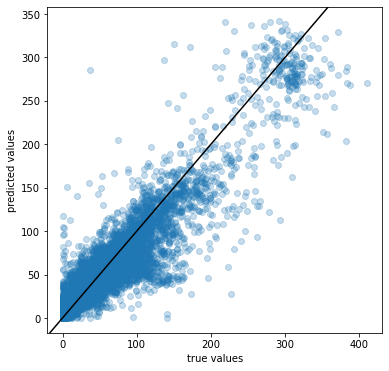

In [27]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# POTASSIUM

## KSSL MIR

In [29]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.41300,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.28625,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.42491,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.44901,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.37489,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.61695,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.20224,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.49763,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,2.68437,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [30]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['k.ext_usda.a725_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.494486,-0.810453,-0.233606,-1.414092,1.660142,0.568209,-0.323180,-0.296138,0.145076,-0.266943,...,0.004350,0.001932,-0.000569,-0.000368,0.000528,-0.003397,-0.000604,0.000110,-0.002108,-0.001268
1,-3.900528,-1.245121,-1.425319,-1.383596,1.168520,0.645825,-0.191617,-0.049692,0.094261,-0.232677,...,0.005467,0.000694,0.001319,0.000209,-0.001299,-0.004230,0.000567,-0.000332,-0.001947,-0.002494
2,-4.784000,0.500038,-2.470415,-0.962734,1.672970,0.647216,-0.026352,0.220571,0.055962,-0.055991,...,0.004352,0.004472,0.001597,-0.001113,-0.001550,-0.004384,0.000664,0.002115,-0.000587,0.001807
3,-3.400495,0.765722,-3.098362,-0.872945,1.777006,0.170920,0.343699,0.405924,-0.032140,-0.042224,...,0.003807,0.007028,-0.001497,0.002121,-0.000150,-0.003362,-0.001760,0.000324,-0.000213,-0.000446
4,-0.969349,1.128849,-3.118965,-0.892163,1.735337,0.078860,0.608932,0.304429,-0.025511,0.276480,...,0.003234,0.006222,-0.005689,0.003551,-0.000158,-0.000809,-0.002222,-0.000082,0.001617,-0.002320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53225,-2.906158,0.621581,-1.492374,-0.493949,2.005154,-0.791766,0.960679,-0.056959,-0.544764,0.371860,...,-0.005558,0.006590,0.011050,-0.000927,0.000730,-0.004955,-0.005426,-0.005463,0.001243,0.001437
53226,-2.525925,0.215057,-1.405136,-0.586357,1.702383,-0.800629,1.100840,-0.021113,-0.467134,0.363516,...,-0.005802,0.009211,0.011320,-0.000382,0.002509,-0.003596,-0.005155,-0.002755,0.002264,0.000241
53227,-3.136521,0.931177,-1.967343,-0.257957,2.571655,-0.500524,0.727981,0.298039,-0.520940,0.208039,...,-0.005489,0.004336,0.004992,-0.000924,0.004783,-0.002876,-0.001835,-0.006006,0.000206,0.002017
53228,-3.787079,2.126130,-1.522515,-1.505274,0.924983,-2.488626,0.735177,-0.614178,-0.379851,0.302707,...,-0.011204,0.010988,0.000488,0.003663,-0.007060,-0.003754,0.001665,0.003731,-0.002273,-0.004559


In [31]:
sum(pca.explained_variance_ratio_)

0.9999876925123937

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04)

In [33]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.9985730488206758
R^2 for 1 committees: 0.07659105702333457


RMSE for 5 committees: 0.7494386022255202
R^2 for 5 committees: 0.3069727764791158


RMSE for 10 committees: 0.7509926095258203
R^2 for 10 committees: 0.3055357416620408


RMSE for 15 committees: 0.7570156651591137
R^2 for 15 committees: 0.29996605054890935


RMSE for 20 committees: 0.7492718252355223
R^2 for 20 committees: 0.30712699991247283




RMSE: 0.5056115400301747
R^2: 0.5274466550571137
bias: 0.3024268294328119
RPIQ: 1.1022394426810294


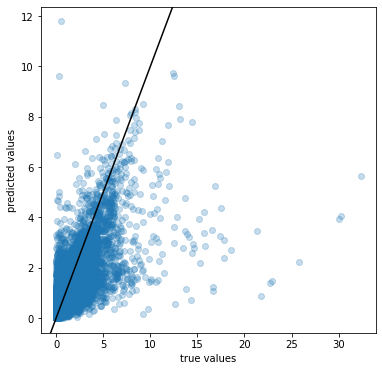

In [34]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [36]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.449639,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.635327,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,2.512149,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.427695,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,2.041537,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,5.744539,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,3.367947,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,2.450765,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,2.613944,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [37]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[visnir_columns[25:]]), columns=column_names)
y = data['k.ext_usda.a725_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-3.282084,0.468792,-0.099416,-0.122922,0.008270,0.060994,-0.064813,-0.018273,0.004052,0.001700,...,0.000047,3.110283e-05,1.164922e-05,0.000012,0.000004,-2.238425e-05,1.489643e-05,-0.000051,0.000005,-0.000019
1,0.960800,-0.125627,0.005452,0.071959,-0.108119,0.059972,-0.096277,0.040820,0.007001,0.028815,...,-0.000094,1.221659e-05,-2.558621e-05,-0.000025,0.000031,-6.873883e-05,-6.781259e-08,-0.000075,-0.000059,-0.000020
2,2.018114,0.211346,0.465043,-0.172184,-0.123954,-0.157544,0.055438,0.018517,-0.007862,0.010130,...,-0.000021,-1.512145e-05,-2.531895e-05,0.000007,0.000072,5.032364e-06,6.294471e-05,-0.000008,0.000024,-0.000026
3,-0.532199,0.869678,0.927895,-0.026430,0.055823,-0.173424,-0.116186,-0.016011,-0.011813,-0.000320,...,0.000063,6.177995e-05,-1.280512e-04,0.000030,0.000156,4.923307e-07,1.917598e-05,-0.000119,0.000075,-0.000098
4,1.932935,-0.266347,0.204350,-0.109689,-0.024991,0.055877,0.007002,0.009199,-0.011258,0.021262,...,-0.000065,3.247527e-07,-1.289674e-08,-0.000021,-0.000046,-3.919613e-05,6.044128e-06,-0.000019,0.000028,-0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40170,-2.806924,0.434093,0.537084,-0.146144,-0.243728,-0.106616,0.014965,-0.103266,0.113039,-0.039688,...,-0.000039,7.198088e-05,5.012033e-05,-0.000085,0.000057,-7.510319e-05,-1.951167e-05,-0.000079,-0.000075,-0.000046
40171,-1.207316,-0.002321,0.583649,-0.208407,-0.276622,-0.136205,-0.013824,-0.088792,0.122823,-0.045174,...,-0.000038,2.127283e-05,2.783594e-05,-0.000093,0.000093,-4.679444e-05,4.147860e-05,-0.000049,-0.000028,0.000006
40172,-2.954377,0.635402,0.412480,0.043823,-0.177547,-0.178759,-0.026106,-0.017539,0.038498,-0.029057,...,-0.000062,2.904067e-05,9.189252e-06,-0.000051,-0.000001,-2.079318e-05,-2.392960e-05,-0.000092,0.000012,-0.000028
40173,-2.468232,0.237416,0.005572,0.106629,-0.203854,-0.006834,-0.036128,0.046570,0.045997,-0.071390,...,-0.000219,-2.740791e-05,2.052058e-06,-0.000061,0.000075,-6.529132e-05,-9.249638e-05,-0.000065,-0.000054,-0.000132


In [38]:
sum(pca.explained_variance_ratio_)

0.9999999888706868

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 5.2615832817056685
R^2 for 1 committees: -0.7144359523460506


RMSE for 5 committees: 3.905212600215125
R^2 for 5 committees: -0.2724757026354989


RMSE for 10 committees: 3.478252644189043
R^2 for 10 committees: -0.13335493619845984


RMSE for 15 committees: 3.4667017703513126
R^2 for 15 committees: -0.12959119583208123


RMSE for 20 committees: 3.397281889847741
R^2 for 20 committees: -0.10697140012216555




RMSE: 0.9001275529879175
R^2: 0.3142513803463681
bias: 0.43516714347288604
RPIQ: 0.6816282753399051


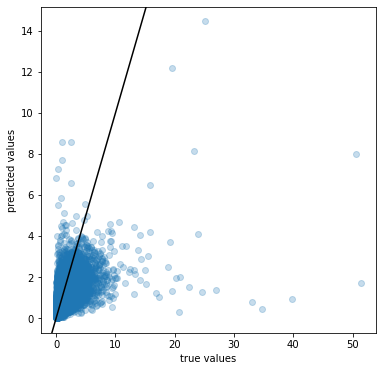

In [41]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# IRON

## KSSL MIR

In [42]:
columns = []
columns.append('fe.dith_usda.a66_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,fe.dith_usda.a66_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.09028,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.51359,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,2.41690,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.73210,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.37132,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.36524,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.26761,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.40614,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.40668,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [43]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['fe.dith_usda.a66_w.pct']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,0.013085,-0.595679,0.029634,-1.576170,-1.784681,0.803236,-0.129623,-0.260679,0.078243,-0.306250,...,0.000982,-0.000909,0.001502,0.002013,-0.001450,0.001683,0.001172,-0.003706,-0.000305,0.000256
1,-3.390915,-1.017054,-1.229519,-1.729243,-1.523053,0.765113,0.073103,-0.054141,0.032706,-0.258734,...,0.000495,0.000777,0.000345,0.001171,-0.000501,0.001649,0.000750,-0.007151,0.000612,-0.001486
2,-4.285327,0.810972,-2.142018,-1.465113,-2.061815,0.822302,0.290965,0.191940,0.048063,-0.117179,...,0.003557,-0.001817,-0.002432,0.001577,0.001537,0.002006,0.001811,-0.002015,-0.000563,0.001699
3,-2.898336,1.106877,-2.724217,-1.364757,-2.333449,0.368871,0.657654,0.354419,0.003865,-0.103241,...,0.004176,-0.007015,0.000067,-0.000436,0.000199,-0.000479,-0.000065,-0.002260,-0.001266,0.003025
4,-0.468642,1.487594,-2.722348,-1.353271,-2.283372,0.249555,0.891613,0.219787,0.008223,0.216462,...,0.001131,-0.008574,0.004298,-0.001113,0.000875,-0.002987,-0.001824,0.000013,-0.002938,0.000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31133,-2.397316,0.872215,-1.142425,-0.627134,-2.539759,-0.449272,1.105553,0.002977,-0.554154,0.436490,...,0.012721,-0.000548,-0.005120,0.011222,0.000533,-0.002915,-0.001282,-0.003768,0.004444,-0.000050
31134,-2.014955,0.446246,-1.106921,-0.702389,-2.256177,-0.520156,1.242217,0.010974,-0.485709,0.450712,...,0.013853,-0.002214,-0.004088,0.011616,-0.000195,-0.003378,-0.001428,-0.001858,0.000883,-0.000907
31135,-2.629320,1.251655,-1.552827,-0.469983,-3.038892,-0.030907,0.935500,0.341495,-0.472522,0.194569,...,0.006835,-0.001458,-0.000949,0.006144,-0.003414,-0.000751,-0.000664,-0.001585,0.005448,0.001201
31136,-3.285920,2.192132,-1.092825,-1.589699,-1.987771,-2.507421,0.784713,-0.469413,-0.441633,0.513556,...,0.005937,-0.010956,0.004629,0.003074,0.010557,0.004133,0.000558,-0.001399,-0.003626,0.002321


In [44]:
sum(pca.explained_variance_ratio_)

0.9999882571387091

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [46]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 0.6728051954713167
R^2 for 1 committees: 0.6597829508303487


RMSE for 5 committees: 0.42371369672992265
R^2 for 5 committees: 0.785740917929097


RMSE for 10 committees: 0.40865884866015484
R^2 for 10 committees: 0.7933536950308043


RMSE for 15 committees: 0.39662895134586734
R^2 for 15 committees: 0.7994368468756912


RMSE for 20 committees: 0.3862957931073159
R^2 for 20 committees: 0.8046620095649601




RMSE: 0.4115300226980645
R^2: 0.8382446685664138
bias: 0.3306245026354148
RPIQ: 2.5870909036613736


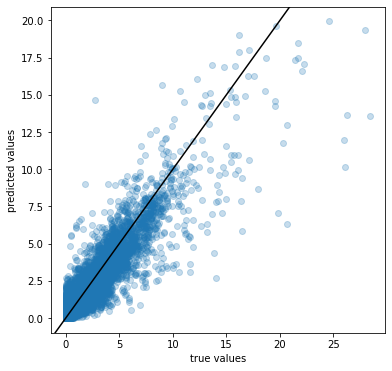

In [47]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# MAGNESIUM

## KSSL MIR

In [49]:
columns = []
columns.append('mg.ext_usda.a724_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,mg.ext_usda.a724_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,4.15291,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.48653,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,8.42312,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,8.55486,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,6.99786,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.45291,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.36408,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,2.18885,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,5.81614,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [50]:
components = 120

column_names = []
for i in range(components):
    column_names.append('PC_' + str(i+1))

pca = PCA(n_components=components)

X = pd.DataFrame(data=pca.fit_transform(data[mir_columns]), columns=column_names)
y = data['mg.ext_usda.a724_cmolc.kg']
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_111,PC_112,PC_113,PC_114,PC_115,PC_116,PC_117,PC_118,PC_119,PC_120
0,-0.494467,-0.810452,-0.233684,-1.414338,1.659807,0.568271,-0.323255,-0.296117,0.145096,-0.266846,...,0.004349,0.001929,-0.000571,-0.000357,0.000545,-0.003426,-0.000654,0.000036,-0.002064,-0.001309
1,-3.900512,-1.245104,-1.425375,-1.383679,1.168145,0.645895,-0.191714,-0.049669,0.094262,-0.232539,...,0.005452,0.000709,0.001318,0.000215,-0.001293,-0.004224,0.000533,-0.000295,-0.001873,-0.002329
2,-4.783999,0.500086,-2.470410,-0.962866,1.672630,0.647320,-0.026490,0.220596,0.055926,-0.055822,...,0.004330,0.004501,0.001603,-0.001123,-0.001550,-0.004346,0.000675,0.002238,-0.000456,0.002049
3,-3.400501,0.765802,-3.098367,-0.873074,1.776681,0.171027,0.343534,0.405952,-0.032202,-0.042039,...,0.003810,0.007012,-0.001488,0.002094,-0.000134,-0.003447,-0.001778,0.000236,-0.000304,-0.000513
4,-0.969357,1.128945,-3.118976,-0.892289,1.735016,0.078959,0.608765,0.304462,-0.025581,0.276624,...,0.003238,0.006214,-0.005683,0.003541,-0.000151,-0.000839,-0.002205,-0.000033,0.001517,-0.002299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53227,-2.906159,0.621627,-1.492403,-0.494239,2.005001,-0.791696,0.960540,-0.056942,-0.544797,0.371715,...,-0.005577,0.006636,0.011081,-0.000868,0.000685,-0.004757,-0.005497,-0.005120,0.001902,0.001850
53228,-2.525923,0.215102,-1.405178,-0.586595,1.702222,-0.800574,1.100714,-0.021092,-0.467164,0.363344,...,-0.005822,0.009255,0.011353,-0.000350,0.002452,-0.003440,-0.005197,-0.002459,0.002816,0.000619
53229,-3.136526,0.931235,-1.967356,-0.258322,2.571515,-0.500424,0.727816,0.298055,-0.521002,0.208077,...,-0.005487,0.004341,0.005009,-0.000906,0.004789,-0.002825,-0.001870,-0.005899,0.000473,0.002196
53230,-3.787090,2.126176,-1.522538,-1.505367,0.924658,-2.488560,0.735018,-0.614163,-0.379857,0.302322,...,-0.011216,0.010983,0.000508,0.003645,-0.007029,-0.003763,0.001695,0.003788,-0.002445,-0.004273


In [51]:
sum(pca.explained_variance_ratio_)

0.9999876928406034

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03)

In [53]:
for committees in [1, 5, 10, 15, 20]:
    model = Cubist(n_committees=committees)
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE for', committees, 'committees:', np.mean(rmse))
    print('R^2 for', committees, 'committees:', np.mean(r2))
    print('\n')

RMSE for 1 committees: 43.500993411629835
R^2 for 1 committees: 0.4384517396893596


RMSE for 5 committees: 36.41653173920247
R^2 for 5 committees: 0.5299040679096485


RMSE for 10 committees: 33.63122586239601
R^2 for 10 committees: 0.5658591932272123


RMSE for 15 committees: 34.09197698075694
R^2 for 15 committees: 0.5599114212647773


RMSE for 20 committees: 33.47824702550489
R^2 for 20 committees: 0.5678339757087909




RMSE: 14.720499232790416
R^2: 0.7879999413877765
bias: 1.6931598371138097
RPIQ: 0.3720576196401481


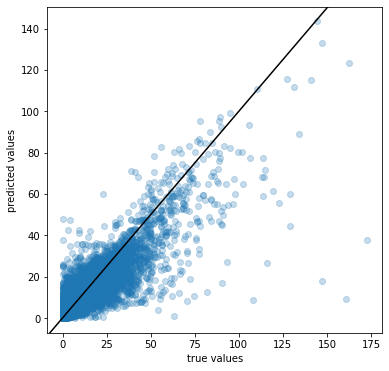

In [54]:
model = Cubist(n_committees=5)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()